# Berlin Road Accidents Analysis and Risk Prediction
#### Problem statement: 
        The task of this project is to derive meaningful information by analysis datasets features and 
        developing a machine learning solution for predicting severity of road accidents. 
#### Dataset: 
        Road traffic accidents by accident location in Berlin 2019 - 2021.
## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline
from dash import Dash, dcc, html, Input, Output, State
import dash_ag_grid as dag
import dash_bootstrap_components as dbc
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'svg' 
plt.style.use('ggplot')


/Users/rajwaghela/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
type_of_collision = {
    0:'Other Type of Accident',
    1:'Collision with Stationary Vehicle',
    2:'Collision with Vehicle in Front',
    3:'Collision with Vehicle Travel in Sideway',
    4:'Collision with Oncoming Vehicle',
    5:'Collision with Turing/Crossing Vehicle',
    6:'Collision between Vehicle and Pedestrain',
    7:'Collision with Road Obstacle',
    8:'Moving off the Road to the Right',
    9:'Left Lane departure'
}
types_of_accident = {
    1:'Driving Accident',
    2:'Turning Accident',
    3:'Crossing/Turning Accident',
    4:'Overshoot Accident',
    5:'Accident due to Stationary Traffic',
    6:'Accident in Longitudinal Traffic',
    7:'Other Traffic',
}
road_condition = {
    0:'Dry',
    1:'Wet',
    2:'Winter smooth'
}
light_condition = {
    0: 'Daylight',
    1:'Twilight',
    2:'Darkness'
}
days = [
    ['1', 'Sunday'],
    ['2', 'Monday'],
    ['3', 'Tuesday'],
    ['4', 'Wednesday'],
    ['5', 'Thursday'],
    ['6', 'Friday'],
    ['7', 'Saturday']
    ]
Severity_level = {
    1:'Fatal',
    2:'Serious',
    3:'Minor',
}

## Load the datasets

In [3]:
path_2021 = '/Users/rajwaghela/Downloads/Projects/Berlin dataset/Datasets/Road Accidents/Road_accidents_2021.csv'
path_2020 = '/Users/rajwaghela/Downloads/Projects/Berlin dataset/Datasets/Road Accidents/Road_accidents_2020.csv'
Accidents_df_2021 = pd.read_csv(path_2021, sep=';')
Accidents_df_2020 = pd.read_csv(path_2020, sep=';')
Accidents_df_2020 = Accidents_df_2020.drop(columns=['LOR_ab_2021'])
Accidents_df_2021 = Accidents_df_2021.rename(columns={'LOR_ab_2021':'LOR'})
Accidents_df = pd.concat([Accidents_df_2021, Accidents_df_2020], axis=0)
Accidents_df.tail(3)

OBJECTID  LAND  BEZ        LOR  UJAHR  UMONAT  USTUNDE  UWOCHENTAG  \
11807    146065    11    1  1011306.0   2020      12       14           3   
11808    146068    11    1  1011204.0   2020      12       16           3   
11809    146070    11    1  1033101.0   2020      12       14           4   

       UKATEGORIE  UART  ...  IstPKW  IstFuss  IstKrad  IstGkfz  IstSonstige  \
11807           3     5  ...       1        0        0        0            1   
11808           3     6  ...       1        1        0        0            0   
11809           3     2  ...       1        0        0        1            0   

       USTRZUSTAND      LINREFX      LINREFY    XGCSWGS84    YGCSWGS84  
11807            0  799900,8048  5826514,725  13,41964879  52,50609051  
11808            1  797982,8966  5826897,222  13,39181741     52,51057  
11809            0  797307,1285  5832290,574  13,38671399   52,5592837  

[3 rows x 23 columns]

In [4]:
# renamings columns 
col_names = {'BEZ':'District_No', 'UJAHR':'Year', 'UMONAT':'Month', 'USTUNDE':'Hour', 
             'UWOCHENTAG':'Weekday', 'UKATEGORIE':'Severity', 'UART':'Collision', 'UTYP1':'Accident_Type', 
             'ULICHTVERH':'Light_Condition', 'IstRad':'Bicycle', 'IstPKW':'Car', 'IstFuss':'Pedestrian', 
             'IstKrad':'Motor_Cycle', 'IstGkfz':'Heavy_vehicles', 'IstSonstige':'Others', 'USTRZUSTAND':'Road_Condition',
            }
Accidents_df = Accidents_df.rename(columns=col_names)
Accidents_df

OBJECTID  LAND  District_No         LOR  Year  Month  Hour  Weekday  \
0        219249    11            3   3701658.0  2021     11    18        2   
1        219248    11            7   7501134.0  2021     12    19        7   
2        219247    11            4   4100101.0  2021     12    17        4   
3        219246    11            4   4501041.0  2021     12    15        7   
4        219243    11           11  11501339.0  2021     12     9        5   
...         ...   ...          ...         ...   ...    ...   ...      ...   
11805    146061    11            7   7040403.0  2020     12     7        4   
11806    146062    11           12  12231101.0  2020     12    17        3   
11807    146065    11            1   1011306.0  2020     12    14        3   
11808    146068    11            1   1011204.0  2020     12    16        3   
11809    146070    11            1   1033101.0  2020     12    14        4   

       Severity  Collision  ...  Car  Pedestrian  Motor_Cycle  Heavy_vehicles  \
0             3          0  ...    1           0            1               0   
1             3          6  ...    1           1            0               0   
2             3          5  ...    1           0            0               0   
3             3          5  ...    1           0            1               0   
4             3          3  ...    1           0            0               0   
...         ...        ...  ...  ...         ...          ...             ...   
11805         3          6  ...    1           1            0               0   
11806         3          5  ...    1           0            0               0   
11807         3          5  ...    1           0            0               0   
11808         3          6  ...    1           1            0               0   
11809         3          2  ...    1           0            0               1   

       Others  Road_Condition      LINREFX      LINREFY    XGCSWGS84  \
0           0               1  800202,0742  5829640,204  13,42689483   
1           0               1  798479,5317  5819049,219  13,39209027   
2           0               0  793352,6128  5829680,195  13,32624193   
3           0               1  792950,0395  5825362,081  13,31652064   
4           1               2    807182,01  5825602,793  13,52575163   
...       ...             ...          ...          ...          ...   
11805       0               1  797339,7447  5821935,194  13,37794126   
11806       0               1  791814,8333  5837953,171  13,31091476   
11807       1               0  799900,8048  5826514,725  13,41964879   
11808       0               1  797982,8966  5826897,222  13,39181741   
11809       0               0  797307,1285  5832290,574  13,38671399   

         YGCSWGS84  
0      52,53393955  
1      52,43995086  
2      52,53802784  
3      52,49953417  
4      52,49386714  
...            ...  
11805  52,46644169  
11806  52,61301792  
11807  52,50609051  
11808     52,51057  
11809   52,5592837  

[23077 rows x 23 columns]

In [5]:
Accidents_df.columns

Index(['OBJECTID', 'LAND', 'District_No', 'LOR', 'Year', 'Month', 'Hour',
       'Weekday', 'Severity', 'Collision', 'Accident_Type', 'Light_Condition',
       'Bicycle', 'Car', 'Pedestrian', 'Motor_Cycle', 'Heavy_vehicles',
       'Others', 'Road_Condition', 'LINREFX', 'LINREFY', 'XGCSWGS84',
       'YGCSWGS84'],
      dtype='object')

In [6]:
Accidents_df.describe()

OBJECTID     LAND   District_No           LOR          Year  \
count   23077.000000  23077.0  23077.000000  2.307500e+04  23077.000000   
mean   160269.863414     11.0      5.558651  5.719538e+06   2020.488235   
std     56686.148174      0.0      3.490322  3.501948e+06      0.499872   
min      3187.000000     11.0      1.000000  1.011101e+06   2020.000000   
25%    138320.000000     11.0      2.000000  2.500833e+06   2020.000000   
50%    144089.000000     11.0      5.000000  5.100105e+06   2020.000000   
75%    213122.000000     11.0      8.000000  8.200726e+06   2021.000000   
max    219249.000000     11.0     12.000000  1.260124e+07   2021.000000   

              Month          Hour       Weekday      Severity     Collision  \
count  23077.000000  23077.000000  23077.000000  23077.000000  23077.000000   
mean       6.958963     13.563808      4.065346      2.846254      3.480045   
std        3.127596      4.703993      1.805255      0.369731      2.193374   
min        1.000000      0.000000      1.000000      1.000000      0.000000   
25%        5.000000     10.000000      3.000000      3.000000      2.000000   
50%        7.000000     14.000000      4.000000      3.000000      5.000000   
75%        9.000000     17.000000      6.000000      3.000000      5.000000   
max       12.000000     23.000000      7.000000      3.000000      9.000000   

       Accident_Type  Light_Condition       Bicycle           Car  \
count   23077.000000     23077.000000  23077.000000  23077.000000   
mean        3.865840         0.429562      0.405599      0.798024   
std         1.933778         0.784689      0.491018      0.401483   
min         1.000000         0.000000      0.000000      0.000000   
25%         2.000000         0.000000      0.000000      1.000000   
50%         3.000000         0.000000      0.000000      1.000000   
75%         6.000000         0.000000      1.000000      1.000000   
max         7.000000         2.000000      1.000000      1.000000   

         Pedestrian   Motor_Cycle  Heavy_vehicles        Others  \
count  23077.000000  23077.000000    23077.000000  23077.000000   
mean       0.123760      0.149630        0.030507      0.146250   
std        0.329314      0.356716        0.171980      0.353364   
min        0.000000      0.000000        0.000000      0.000000   
25%        0.000000      0.000000        0.000000      0.000000   
50%        0.000000      0.000000        0.000000      0.000000   
75%        0.000000      0.000000        0.000000      0.000000   
max        1.000000      1.000000        1.000000      1.000000   

       Road_Condition  
count    23077.000000  
mean         0.251159  
std          0.451989  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          2.000000

In [7]:
Accidents_df[Accidents_df['Severity'].isnull()]

Empty DataFrame
Columns: [OBJECTID, LAND, District_No, LOR, Year, Month, Hour, Weekday, Severity, Collision, Accident_Type, Light_Condition, Bicycle, Car, Pedestrian, Motor_Cycle, Heavy_vehicles, Others, Road_Condition, LINREFX, LINREFY, XGCSWGS84, YGCSWGS84]
Index: []

[0 rows x 23 columns]

In [8]:
Accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23077 entries, 0 to 11809
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OBJECTID         23077 non-null  int64  
 1   LAND             23077 non-null  int64  
 2   District_No      23077 non-null  int64  
 3   LOR              23075 non-null  float64
 4   Year             23077 non-null  int64  
 5   Month            23077 non-null  int64  
 6   Hour             23077 non-null  int64  
 7   Weekday          23077 non-null  int64  
 8   Severity         23077 non-null  int64  
 9   Collision        23077 non-null  int64  
 10  Accident_Type    23077 non-null  int64  
 11  Light_Condition  23077 non-null  int64  
 12  Bicycle          23077 non-null  int64  
 13  Car              23077 non-null  int64  
 14  Pedestrian       23077 non-null  int64  
 15  Motor_Cycle      23077 non-null  int64  
 16  Heavy_vehicles   23077 non-null  int64  
 17  Others      

In [9]:
Accidents_df.isnull().all()

OBJECTID           False
LAND               False
District_No        False
LOR                False
Year               False
Month              False
Hour               False
Weekday            False
Severity           False
Collision          False
Accident_Type      False
Light_Condition    False
Bicycle            False
Car                False
Pedestrian         False
Motor_Cycle        False
Heavy_vehicles     False
Others             False
Road_Condition     False
LINREFX            False
LINREFY            False
XGCSWGS84          False
YGCSWGS84          False
dtype: bool

## Data Exploration and Visualization

### Accident Severity distribution

In [10]:
Severities = pd.DataFrame(Accidents_df.Severity.value_counts())
Severities = Severities.rename({1: 'Accidents with fatilites', 2:'Accidents with serious injuries', 3:'Accidents with minor injureies'}, axis=0)
Severities['percentage'] = round((Severities / Severities.sum()), 4)
Severities  = Severities.reset_index()
Severities

index  Severity  percentage
0   Accidents with minor injureies     19605      0.8495
1  Accidents with serious injuries      3396      0.1472
2         Accidents with fatilites        76      0.0033

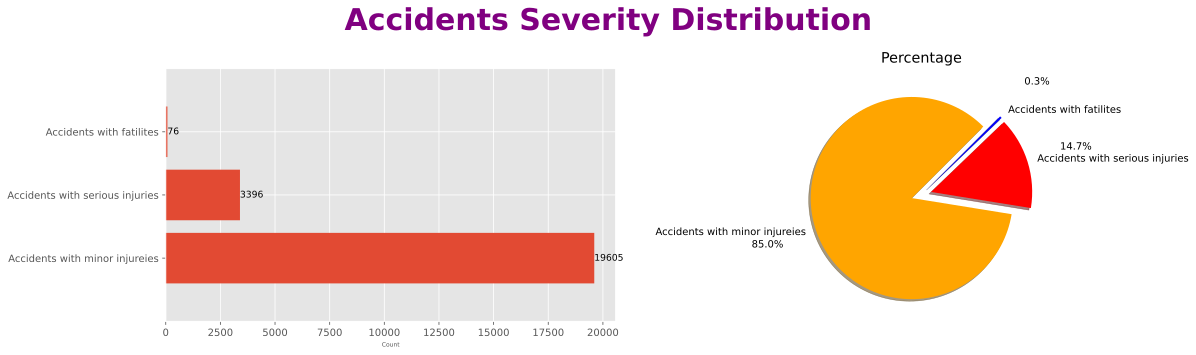

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (17, 5))

# barplot
bar = ax[0].barh(y=Severities['index'], width=Severities['Severity'])
ax[0].set_xlabel('Count', size=6)
ax[0].set_ylim(-1, 3)
ax[0].bar_label(bar, size = 9.2, color ='black',)

# pie chart
ax[1].pie(Severities['percentage'], startangle = 45, 
        colors = ['Orange', 'Red', 'Blue'], 
        autopct='%1.1f%%',
        pctdistance=1.5,
        labels = Severities['index'],
        explode = [0.1, 0.1, 0.1],
        shadow = True)
ax[1].set_title('Percentage')

fig.suptitle('Accidents Severity Distribution',fontsize=30, fontweight = 'bold', color = 'purple', fontname = 'sans')
plt.GridSpec(1, 3, width_ratios=[1, 0.8, 0.5])
plt.tight_layout()
plt.show()

### Casualites by Type of Collisions

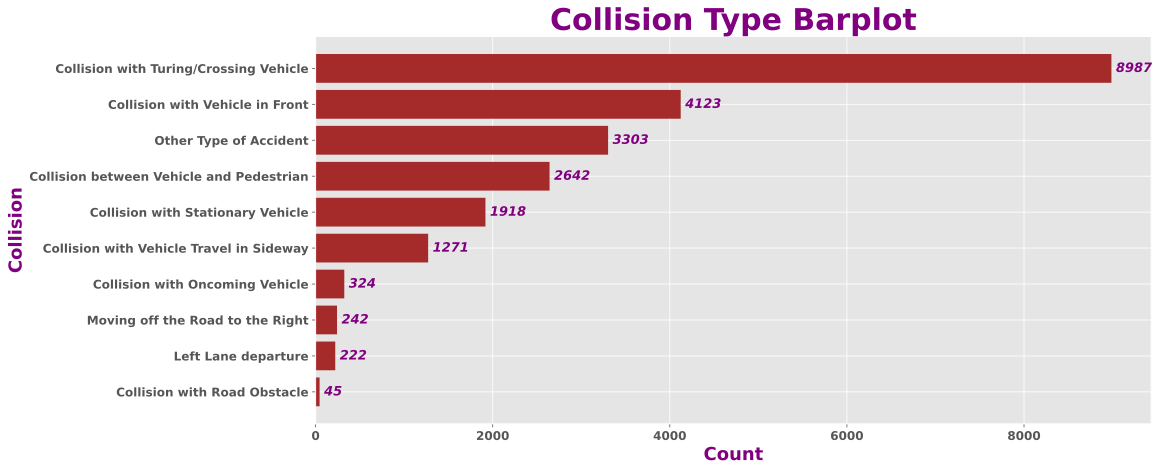

In [12]:
type_of_collision = {
    0: 'Other Type of Accident',
    1: 'Collision with Stationary Vehicle',
    2: 'Collision with Vehicle in Front',
    3: 'Collision with Vehicle Travel in Sideway',
    4: 'Collision with Oncoming Vehicle',
    5: 'Collision with Turing/Crossing Vehicle',
    6: 'Collision between Vehicle and Pedestrian',
    7: 'Collision with Road Obstacle',
    8: 'Moving off the Road to the Right',
    9: 'Left Lane departure'
}

Collision_value_counts = Accidents_df['Collision'].value_counts()
df_Collision_counts = pd.DataFrame(Collision_value_counts).reset_index()
df_Collision_counts = df_Collision_counts.rename(columns={'index': 'Collision', 'Collision': 'count'})
df_Collision_counts['Type_of_Collision'] = df_Collision_counts['Collision'].map(type_of_collision)
df_Collision_counts = df_Collision_counts.sort_values(by='count', ascending=True).reset_index(drop=True)

plt.style.use('ggplot')
plt.figure(figsize=(15, 7))
bar = plt.barh(data=df_Collision_counts, y='Type_of_Collision', width='count', color='brown')


plt.xticks(size=12, weight='bold')
plt.yticks(size=12, weight='bold')
plt.xlabel(xlabel='Count', fontname='sans', size=18, weight='bold', color='purple')
plt.ylabel(ylabel='Collision', size=18, fontname='sans', weight='bold', color='purple')


plt.bar_label(bar, color='purple', size=13, style='oblique', weight='bold', fontfamily='sans', padding=0, fmt=' %d')

plt.title('Collision Type Barplot', fontsize=30, fontname='sans', fontweight='bold', color='purple')
plt.show()


### Casualties by Accident Type

In [13]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


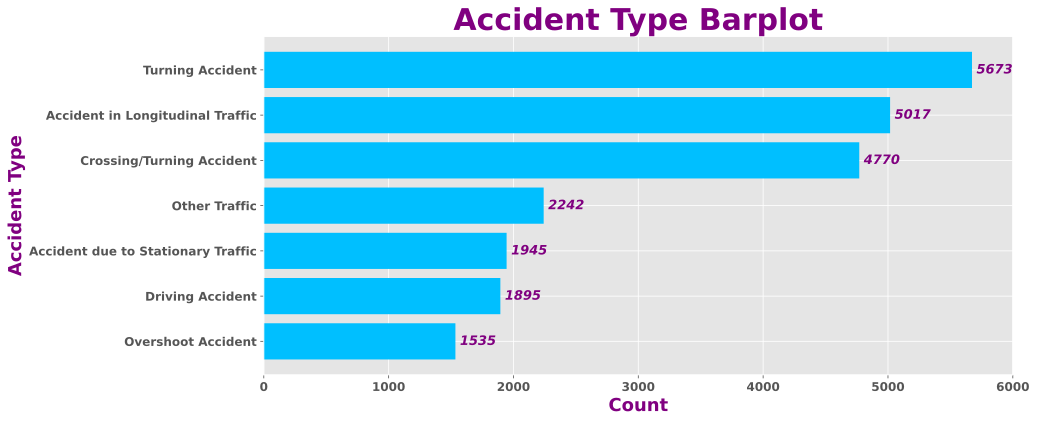

In [14]:
types_of_accident = {
    1: 'Driving Accident',
    2: 'Turning Accident',
    3: 'Crossing/Turning Accident',
    4: 'Overshoot Accident',
    5: 'Accident due to Stationary Traffic',
    6: 'Accident in Longitudinal Traffic',
    7: 'Other Traffic',
}

accident_counts = Accidents_df['Accident_Type'].value_counts()
df_accident_types = pd.DataFrame(accident_counts).reset_index()
df_accident_types = df_accident_types.rename(columns={'index': 'Type_of_Accident', 'Accident_Type': 'count'})
df_accident_types['Type_of_Accident'] = df_accident_types['Type_of_Accident'].map(types_of_accident)
df_accident_types = df_accident_types.sort_values(by='count', ascending=True).reset_index(drop=True)

warnings.filterwarnings('ignore')


fig, ax = plt.subplots(figsize=(14.5, 6))
bar = ax.barh(y='Type_of_Accident', width='count', data=df_accident_types, color='deepskyblue')

labelsx = ax.get_xticklabels()
labelsy = ax.get_yticklabels()

plt.setp(labelsx, rotation=0, horizontalalignment='center')

ax.set_xticklabels(labelsx, size=12, weight='bold')
ax.set_yticklabels(labelsy, size=12, weight='bold')

ax.set(xlim=[0, 6000])
ax.set_xlabel(xlabel='Count', fontname='sans', size=18, weight='bold', color='purple')
ax.set_ylabel(ylabel='Accident Type', size=18, fontname='sans', weight='bold', color='purple')


ax.bar_label(bar, color='purple', size=13, style='oblique', weight='bold', fontfamily='sans', padding=0, fmt=' %d')

ax.set_title('Accident Type Barplot', fontsize=30, fontname='sans', fontweight='bold', color='purple')
ax.grid(True)

plt.tight_layout()
plt.show()


### Casualties by road conditions

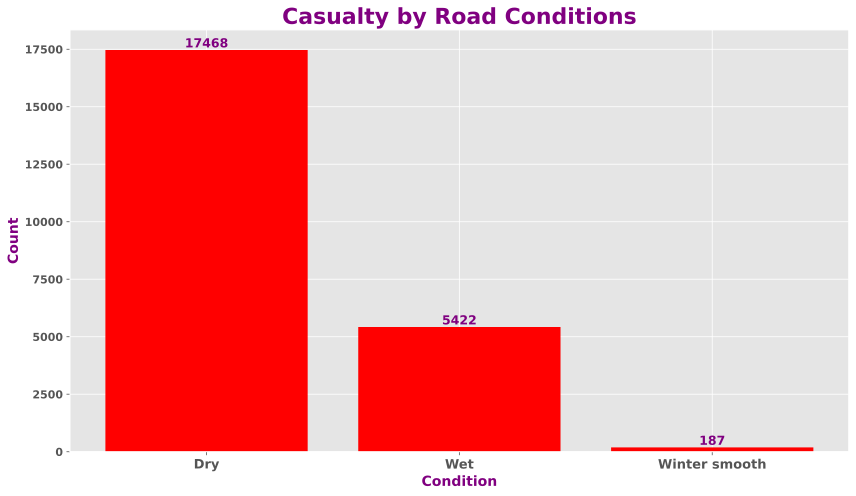

In [15]:
road_condition = {
    0: 'Dry',
    1: 'Wet',
    2: 'Winter smooth'
}

road_condition_count = Accidents_df['Road_Condition'].value_counts()
df_road = pd.DataFrame(road_condition_count).reset_index()
df_road = df_road.rename(columns={'index': 'condition', 'Road_Condition': 'count'})
df_road['condition'] = df_road['condition'].map(road_condition)

fig, ax = plt.subplots(figsize=(12, 7))
bar = ax.bar(x='condition', height='count', data=df_road, color='red')

labelsx = ax.get_xticklabels()
labelsy = ax.get_yticklabels()

ax.set_xlabel(xlabel='Condition', fontname='sans', weight='bold', size=14, color='Purple', loc='center')
ax.set_ylabel(ylabel='Count', fontname='sans', weight='bold', size=14, color='Purple', loc='center')
ax.set_xticklabels(labelsx, size=13, weight='bold')
ax.set_yticklabels(labelsy, size=11, weight='bold')
ax.bar_label(bar, fmt='%d', label_type='edge', fontname='sans', weight='bold', size=12.5, color='Purple')
ax.set_title(label='Casualty by Road Conditions', fontname='sans', weight='bold', size=22, color='purple')

ax.grid(True)
fig.tight_layout()

plt.show()


### Casualty by Light condition

In [16]:
light_condition = {
    0: 'Daylight',
    1:'Twilight',
    2:'Darkness'
}

light_condition_count = Accidents_df['Light_Condition'].value_counts()
df_light = pd.DataFrame(light_condition_count).reset_index()
df_light.insert(loc=0, column='condition', value=df_light['Light_Condition'].map(light_condition))
df_light

condition  index  Light_Condition
0       NaN      0            17441
1       NaN      2             4277
2       NaN      1             1359

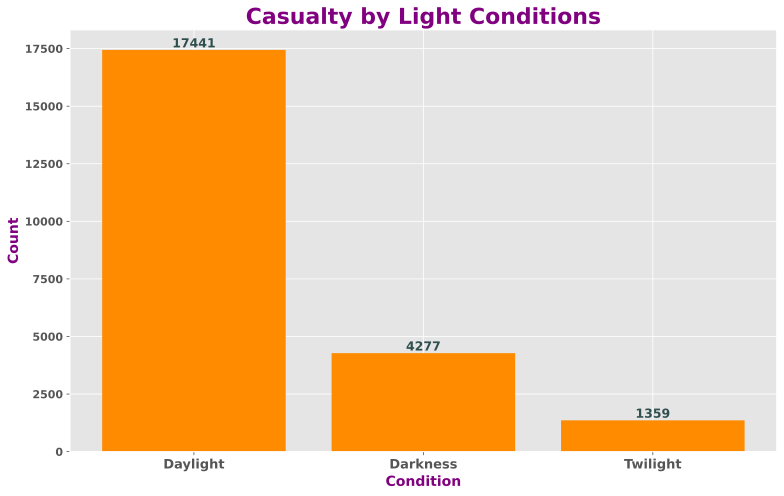

In [17]:
light_condition = {
    0: 'Daylight',
    1: 'Twilight',
    2: 'Darkness'
}

light_condition_count = Accidents_df['Light_Condition'].value_counts()
df_light = pd.DataFrame(light_condition_count).reset_index()
df_light = df_light.rename(columns={'index': 'condition', 'Light_Condition': 'count'})
df_light['condition'] = df_light['condition'].map(light_condition)

fig, ax = plt.subplots(figsize=(11, 7))
bar = ax.bar(x='condition', height='count', color='darkorange', data=df_light)

labelsx = ax.get_xticklabels()
labelsy = ax.get_yticklabels()

ax.set_xlabel(xlabel='Condition', fontname='sans', weight='bold', size=14, color='Purple', loc='center')
ax.set_ylabel(ylabel='Count', fontname='sans', weight='bold', size=14, color='Purple', loc='center')
ax.set_xticklabels(labelsx, size=13, weight='bold')
ax.set_yticklabels(labelsy, size=11, weight='bold')
ax.bar_label(bar, fmt='%d', label_type='edge', fontname='sans', weight='bold', size=12.5, color='darkslategray')
ax.set_title(label='Casualty by Light Conditions', fontname='sans', weight='bold', size=22, color='purple')

ax.grid(True)
fig.tight_layout()

plt.show()


### Temporal analysis

In [18]:
import pandas as pd
import numpy as np

# Extracting data for the year 2021
df_2021 = Accidents_df[Accidents_df['Year'] == 2021]
df_2021 = df_2021[['Month', 'Severity']]
df_2021_counts = pd.DataFrame(df_2021.value_counts(['Month', 'Severity']).reset_index(name='count'))
df_2021_pivot = df_2021_counts.pivot_table(
    values='count',
    columns='Severity',
    index='Month'
).reset_index().fillna(0)
df_2021_pivot['Total'] = df_2021_pivot[1] + df_2021_pivot[2] + df_2021_pivot[3]

# Extracting data for the year 2020
df_2020 = Accidents_df[Accidents_df['Year'] == 2020]
df_2020 = df_2020[['Month', 'Severity']]
df_2020_counts = pd.DataFrame(df_2020.value_counts(['Month', 'Severity']).reset_index(name='count'))
df_2020_pivot = df_2020_counts.pivot_table(
    values='count',
    columns='Severity',
    index='Month'
).reset_index().fillna(0)
df_2020_pivot['Total'] = df_2020_pivot[1] + df_2020_pivot[2] + df_2020_pivot[3]
df_2020_pivot


Severity  Month    1      2       3   Total
0             1  9.0  141.0   712.0   862.0
1             2  7.0  116.0   670.0   793.0
2             3  2.0  111.0   552.0   665.0
3             4  2.0  111.0   632.0   745.0
4             5  4.0  139.0   754.0   897.0
5             6  4.0  176.0  1068.0  1248.0
6             7  4.0  170.0   954.0  1128.0
7             8  5.0  211.0  1191.0  1407.0
8             9  1.0  208.0  1131.0  1340.0
9            10  4.0  159.0  1057.0  1220.0
10           11  3.0  111.0   721.0   835.0
11           12  0.0   89.0   581.0   670.0

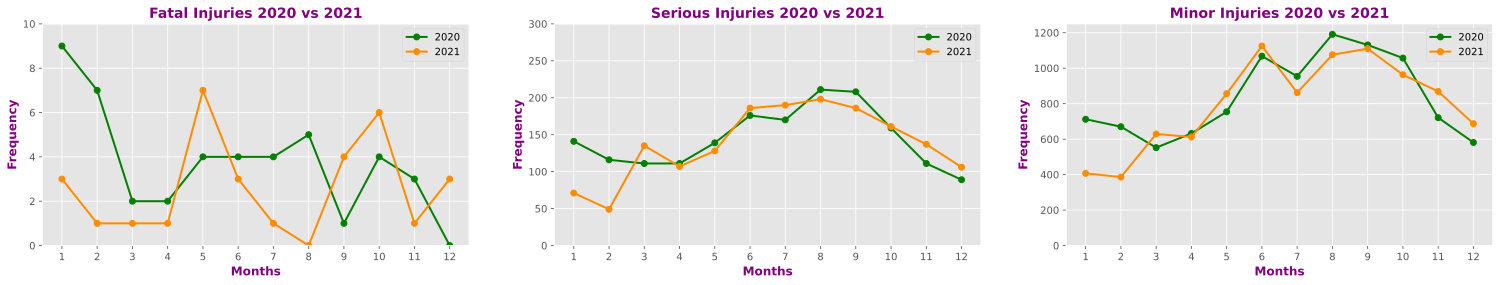

In [19]:
fig, ax = plt.subplots(1, 3, figsize = (26, 4))

ax[0].plot(df_2020_pivot['Month'], df_2020_pivot[1], linestyle = '-', marker = 'o', linewidth = '2', color = 'green')
ax[0].plot(df_2021_pivot['Month'], df_2021_pivot[1], linestyle = '-', marker = 'o',linewidth = '2', color = 'darkorange')
ax[0].set_title('Fatal Injuries 2020 vs 2021', fontname = 'sans', weight = 'bold', size = 14, color = 'purple')
ax[0].set_xlabel(xlabel='Months', fontname = 'sans', weight = 'bold', size = 12, color = 'Purple', loc='center')
ax[0].set_ylabel(ylabel='Frequency', fontname = 'sans', weight = 'bold', size = 12, color ='Purple', loc='center')
ax[0].set_ylim([0, 10])
ax[0].legend(['2020', '2021'], loc = 'upper right')

ax[1].plot(df_2020_pivot['Month'], df_2020_pivot[2], linestyle = '-', marker = 'o', linewidth = '2', color = 'green')
ax[1].plot(df_2021_pivot['Month'], df_2021_pivot[2], linestyle = '-', marker = 'o', linewidth = '2', color = 'darkorange')
ax[1].set_title('Serious Injuries 2020 vs 2021', fontname = 'sans', weight = 'bold', size = 14, color = 'purple')
ax[1].set_xlabel(xlabel='Months', fontname = 'sans', weight = 'bold', size = 12, color = 'Purple', loc='center')
ax[1].set_ylabel(ylabel='Frequency', fontname = 'sans', weight = 'bold', size = 12, color ='Purple', loc='center')
ax[1].set_ylim([0, 300])
ax[1].legend(['2020', '2021'], loc = 'upper right')

ax[2].plot(df_2020_pivot['Month'], df_2020_pivot[3], linestyle = '-', marker = 'o', linewidth = '2', color = 'green')
ax[2].plot(df_2021_pivot['Month'], df_2021_pivot[3], linestyle = '-', marker = 'o', linewidth = '2', color = 'darkorange')
ax[2].set_title('Minor Injuries 2020 vs 2021', fontname = 'sans', weight = 'bold', size = 14, color = 'purple')
ax[2].set_xlabel(xlabel='Months', fontname = 'sans', weight = 'bold', size = 12, color = 'Purple', loc='center')
ax[2].set_ylabel(ylabel='Frequency', fontname = 'sans', weight = 'bold', size = 12, color ='Purple', loc='center')
ax[2].set_ylim([0, 1250])
ax[2].legend(['2020', '2021'], loc = 'upper right')

ax[0].set_xticks(df_2020_pivot['Month'])
ax[1].set_xticks(df_2020_pivot['Month'])
ax[2].set_xticks(df_2020_pivot['Month'])

plt.subplots_adjust(hspace=0.3)
plt.grid(True)
plt.show()


### Collision and Accident type heatmap

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Accident_df is your DataFrame
# If not, replace "Accident_df" with your actual DataFrame name

# Mapping dictionaries
type_of_collision_mapping = {
    0: 'Other Type of Accident',
    1: 'Collision with Stationary Vehicle',
    2: 'Collision with Vehicle in Front',
    3: 'Collision with Vehicle Travel in Sideway',
    4: 'Collision with Oncoming Vehicle',
    5: 'Collision with Turing/Crossing Vehicle',
    6: 'Collision between Vehicle and Pedestrian',
    7: 'Collision with Road Obstacle',
    8: 'Moving off the Road to the Right',
    9: 'Left Lane departure'
}

types_of_accident_mapping = {
    1: 'Driving Accident',
    2: 'Turning Accident',
    3: 'Crossing/Turning Accident',
    4: 'Overshoot Accident',
    5: 'Accident due to Stationary Traffic',
    6: 'Accident in Longitudinal Traffic',
    7: 'Other Traffic',
}

# Count occurrences and create a pivot table
heatmap_data = Accidents_df.groupby(['Collision', 'Accident_Type']).size().reset_index(name='Count')
heatmap_data['Collision'] = heatmap_data['Collision'].map(type_of_collision_mapping)
heatmap_data['Accident_Type'] = heatmap_data['Accident_Type'].map(types_of_accident_mapping)
heatmap_data = heatmap_data.pivot(index='Collision', columns='Accident_Type', values='Count')
heatmap_data = heatmap_data.replace(np.nan, 0)

fig = px.imshow(heatmap_data.values,
                labels=dict(x='Type of Accident', y='Collision Type', color='Count'),
                x=heatmap_data.columns,
                y=heatmap_data.index,
                text_auto=True,
                aspect='auto',
                color_continuous_scale='viridis')

# Customize layout
fig.update_layout(title='Accident vs Collision Heatmap',
                  xaxis_title='Type of Accident',
                  yaxis_title='Collision Type',
                  height=700,
                  width=900,
                  xaxis_tickangle=-45,
                  title_font=dict(size=24),
                  xaxis=dict(title_font=dict(size=20)), 
                  yaxis=dict(title_font=dict(size=20))
)

# Show the plot
fig.show()


In [21]:
Accidents_df.columns

Index(['OBJECTID', 'LAND', 'District_No', 'LOR', 'Year', 'Month', 'Hour',
       'Weekday', 'Severity', 'Collision', 'Accident_Type', 'Light_Condition',
       'Bicycle', 'Car', 'Pedestrian', 'Motor_Cycle', 'Heavy_vehicles',
       'Others', 'Road_Condition', 'LINREFX', 'LINREFY', 'XGCSWGS84',
       'YGCSWGS84'],
      dtype='object')

Target looks like classification


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Collision'>,
 None,
 array([[<Axes: title={'center': 'Accident_Type'}, xlabel='count', ylabel='Accident_Type'>,
         <Axes: title={'center': 'Pedestrian'}, xlabel='count', ylabel='Pedestrian'>,
         <Axes: title={'center': 'Car'}, xlabel='count', ylabel='Car'>,
         <Axes: title={'center': 'Bicycle'}, xlabel='count', ylabel='Bicycle'>],
        [<Axes: title={'center': 'Motor_Cycle'}, xlabel='count', ylabel='Motor_Cycle'>,
         <Axes: title={'center': 'Light_Condition'}, xlabel='count', ylabel='Light_Condition'>,
         <Axes: title={'center': 'Others'}, xlabel='count', ylabel='Others'>,
         <Axes: >]], dtype=object)]

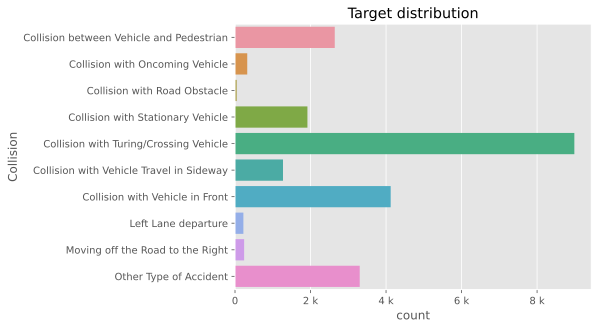

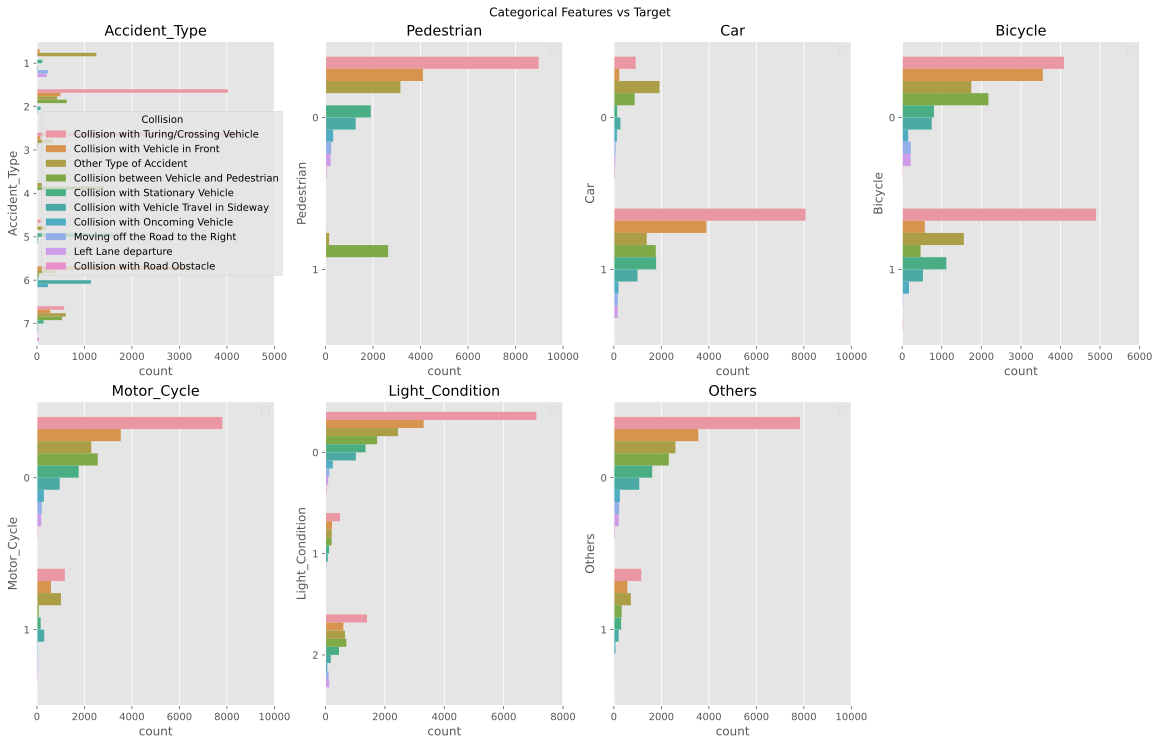

In [22]:
import dabl
dabl_df = Accidents_df.iloc[:, 8:18]
dabl_df = dabl_df.drop(columns=['Severity'])
dabl_df['Collision'] = dabl_df['Collision'].map(type_of_collision)
dabl.plot(dabl_df, target_col='Collision')

Target looks like classification


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Accident_Type'>,
 None,
 array([[<Axes: title={'center': 'Collision'}, xlabel='count', ylabel='Collision'>,
         <Axes: title={'center': 'Pedestrian'}, xlabel='count', ylabel='Pedestrian'>,
         <Axes: title={'center': 'Car'}, xlabel='count', ylabel='Car'>,
         <Axes: title={'center': 'Bicycle'}, xlabel='count', ylabel='Bicycle'>],
        [<Axes: title={'center': 'Motor_Cycle'}, xlabel='count', ylabel='Motor_Cycle'>,
         <Axes: title={'center': 'Light_Condition'}, xlabel='count', ylabel='Light_Condition'>,
         <Axes: title={'center': 'Others'}, xlabel='count', ylabel='Others'>,
         <Axes: >]], dtype=object)]

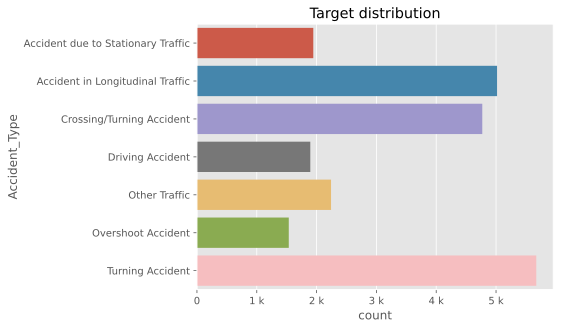

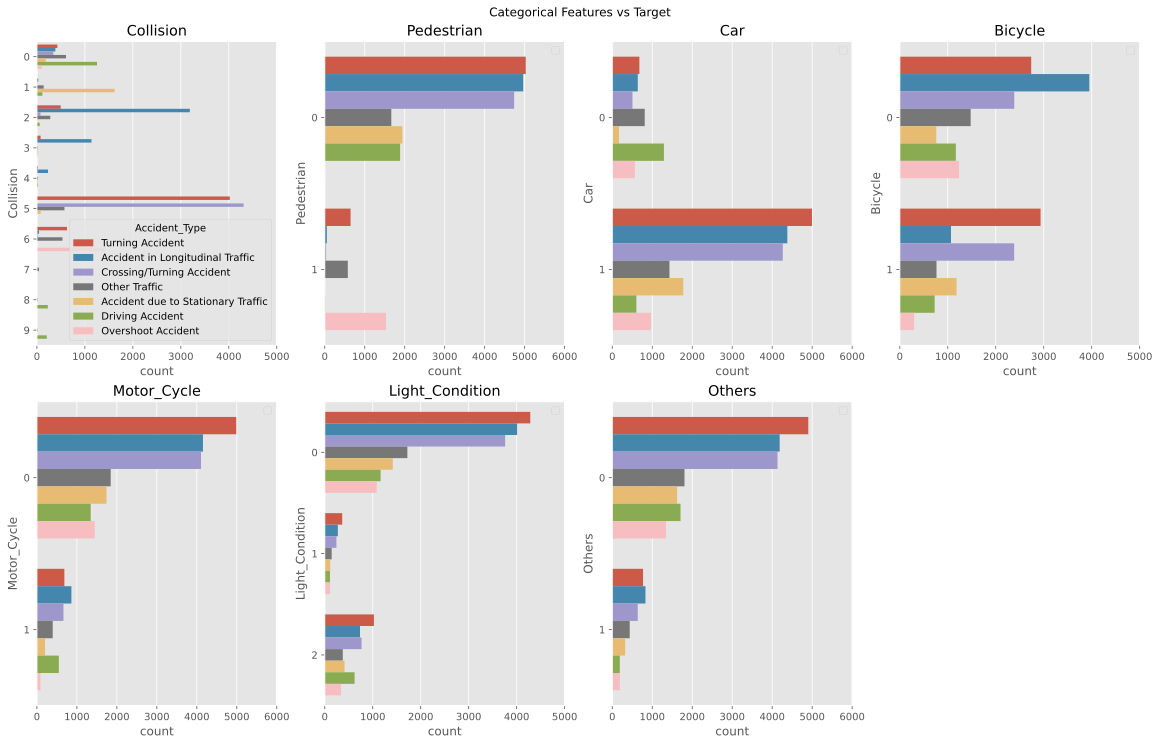

In [23]:
dabl_df = Accidents_df.iloc[:, 8:18]
dabl_df = dabl_df.drop(columns=['Severity'])
dabl_df['Accident_Type'] = dabl_df['Accident_Type'].map(types_of_accident)
dabl.plot(dabl_df, target_col='Accident_Type')

### Accidents by Severity and Day of week 

In [24]:
Accidents_df['Weekday'] = pd.Categorical(Accidents_df['Weekday'], categories=range(1, 8), ordered=True)

# Extracting data for the year 2020
df_2020 = Accidents_df[Accidents_df['Year'] == 2020]
df_2020 = pd.crosstab(index=df_2020['Weekday'], columns=df_2020['Severity'])
df_2020.columns.name = None  # Remove the column name for consistency

# Extracting data for the year 2021
df_2021 = Accidents_df[Accidents_df['Year'] == 2021]
df_2021 = pd.crosstab(index=df_2021['Weekday'], columns=df_2021['Severity'])
df_2021.columns.name = None  # Remove the column name for consistency

# Optionally, fill NaN values with 0 if there are missing combinations
df_2020= df_2020.fillna(0)
df_2021 = df_2021.fillna(0)

In [25]:
def days_and_time_plot(df1, df2, p = 3, c = 'steelblue', option = 'day'): 
    
    days = [
    ['1', 'Sunday'],
    ['2', 'Monday'],
    ['3', 'Tuesday'],
    ['4', 'Wednesday'],
    ['5', 'Thursday'],
    ['6', 'Friday'],
    ['7', 'Saturday']
    ]



    fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))

    bar0 = ax[0].bar(x = df1.index, height = df1[p], color = c, width = 0.7)
    ax[0].set_xlabel(xlabel ='Weekday', name = 'sans', size = 16, color = 'purple', weight = 'normal')
    ax[0].set_ylabel(ylabel ='Frequency', name = 'sans', size = 16, color = 'purple', weight = 'normal')
    ax[0].set_title(label = 'Year = 2020', fontsize=18, fontweight = 'normal', color = 'purple', fontname = 'sans' )
    ax[0].bar_label(bar0, padding = -14, color = 'white', weight = 'normal', name = 'sans', size = 12)


    bar1 = ax[1].bar(x =df2.index, height = df2[p], color = c, width = 0.7)
    ax[1].set_xlabel(xlabel ='Weekday', name = 'sans', size = 16, color = 'purple', weight = 'normal')
    ax[1].set_ylabel(ylabel ='Frequency', name = 'sans', size = 16, color = 'purple', weight = 'normal')
    ax[1].set_title(label = 'Year = 2021', fontsize=18, fontweight = 'normal', color = 'purple', fontname = 'sans' )
    ax[1].bar_label(bar1, padding = -14, color = 'white', weight = 'normal', name = 'sans', size = 12)

    if p == 2:
        ax[0].set_ylim([0, 300])
        ax[1].set_ylim([0, 300])
        fig.suptitle('Serious Type of Accidents by Weekdays',fontsize=24, fontweight = 'bold', color = 'purple', fontname = 'sans')
    elif p == 1:
        ax[0].set_ylim([0, 12])
        ax[1].set_ylim([0, 12])
        fig.suptitle('Fatal Type of Accidents by Weekdays',fontsize=24, fontweight = 'bold', color = 'purple', fontname = 'sans')
    elif p == 3:
        ax[0].set_ylim([0, 1800])
        ax[1].set_ylim([0, 1800])
        fig.suptitle('Minor Type of Accidents by Weekdays',fontsize=24, fontweight = 'bold', color = 'purple', fontname = 'sans')
    else:
        pass

    if option == 'day':
        table = ax[2].table(cellText=days, loc='center', cellLoc='left')
        ax[2].axis('off')
        table.auto_set_font_size(False)
        table.set_fontsize(14)
        table.scale(0.5, 2.2)
    
    plt.subplots_adjust(hspace=1)
    plt.tight_layout()
plt.show()

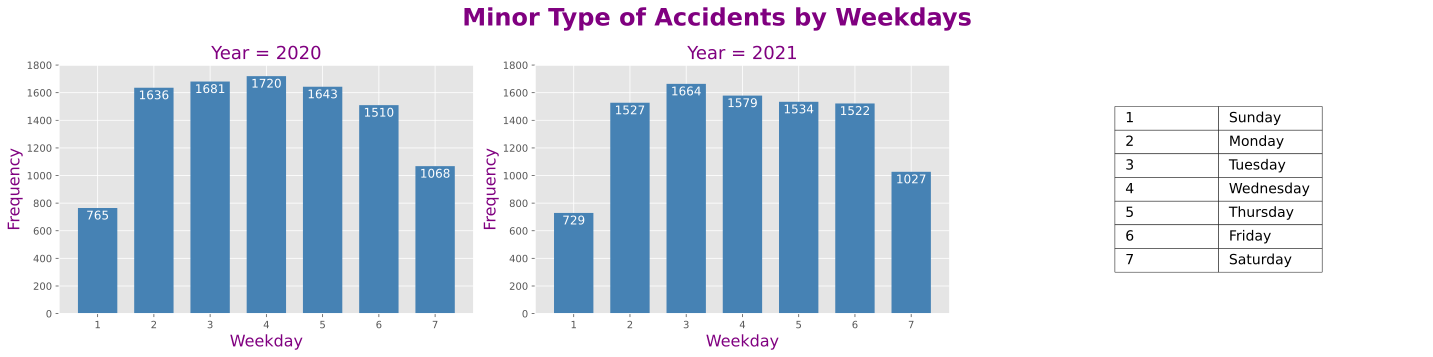

In [26]:
days_and_time_plot(df_2020, df_2021, p=3)

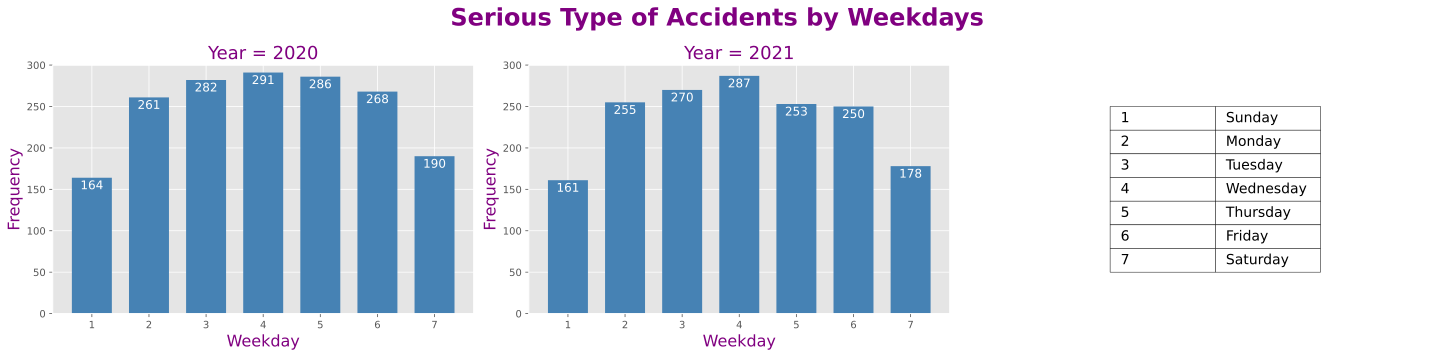

In [27]:
days_and_time_plot(df_2020, df_2021, p=2)

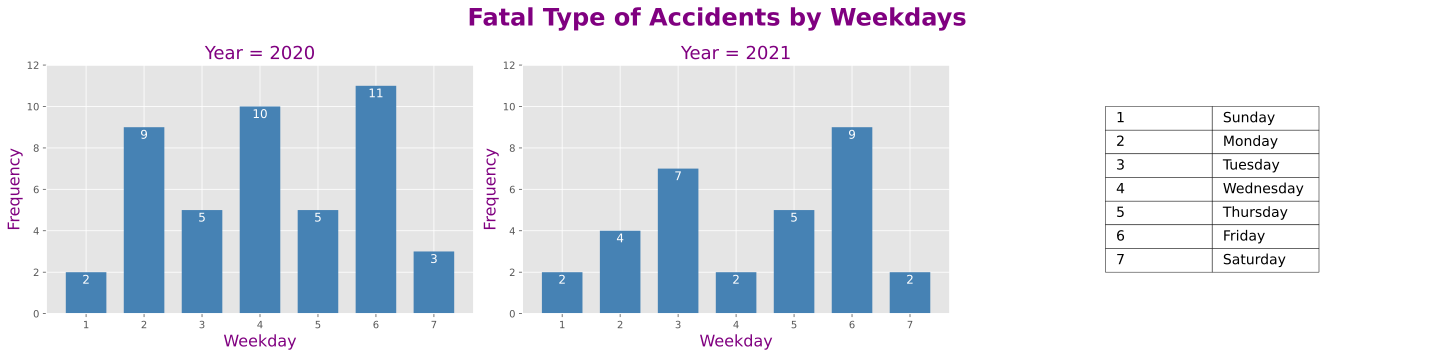

In [28]:
days_and_time_plot(df_2020, df_2021, p=1)

### Accidents Frequency in Maps

    district names dataset source: 'https://daten.odis-berlin.de/en/dataset/bezirksgrenzen/'

In [29]:
import geopandas as gpd 
districts_df = gpd.read_file('/Users/rajwaghela/Downloads/Projects/Berlin dataset/Datasets/bezirksgrenzen.gml')
districts_df = districts_df.drop(columns=['fid', 'gml_id', 'Schluessel_gesamt', 'Land_name', 'Land_schluessel'])
districts_df = districts_df.rename(columns = {
    'Gemeinde_name': 'districts_names',
    'Gemeinde_schluessel': 'District_No'
})
districts_df

districts_names  District_No  \
0                Reinickendorf           12   
1   Charlottenburg-Wilmersdorf            4   
2             Treptow-Köpenick            9   
3                       Pankow            3   
4                     Neukölln            8   
5                  Lichtenberg           11   
6          Marzahn-Hellersdorf           10   
7                      Spandau            5   
8          Steglitz-Zehlendorf            6   
9                        Mitte            1   
10    Friedrichshain-Kreuzberg            2   
11        Tempelhof-Schöneberg            7   

                                             geometry  
0   MULTIPOLYGON (((13.32074 52.62660, 13.32045 52...  
1   MULTIPOLYGON (((13.32111 52.52446, 13.32103 52...  
2   MULTIPOLYGON (((13.57925 52.39083, 13.57958 52...  
3   MULTIPOLYGON (((13.50481 52.61960, 13.50467 52...  
4   MULTIPOLYGON (((13.45832 52.48569, 13.45823 52...  
5   MULTIPOLYGON (((13.52316 52.47424, 13.52367 52...  
6   MULTIPOLYGON (((13.61317 52.47213, 13.61329 52...  
7   MULTIPOLYGON (((13.23119 52.56124, 13.23092 52...  
8   MULTIPOLYGON (((13.31952 52.46699, 13.31910 52...  
9   MULTIPOLYGON (((13.37721 52.56091, 13.37715 52...  
10  MULTIPOLYGON (((13.45529 52.52127, 13.45542 52...  
11  MULTIPOLYGON (((13.38759 52.38677, 13.38761 52...

In [30]:
df_geo_2021 = Accidents_df[Accidents_df['Year']==2021]
df_geo_2021['XGCSWGS84'] = df_geo_2021['XGCSWGS84'].str.replace(',', '.').astype(dtype='float')
df_geo_2021['YGCSWGS84'] = df_geo_2021['YGCSWGS84'].str.replace(',', '.').astype(dtype='float')
df_geo_2021

OBJECTID  LAND  District_No         LOR  Year  Month  Hour Weekday  \
0        219249    11            3   3701658.0  2021     11    18       2   
1        219248    11            7   7501134.0  2021     12    19       7   
2        219247    11            4   4100101.0  2021     12    17       4   
3        219246    11            4   4501041.0  2021     12    15       7   
4        219243    11           11  11501339.0  2021     12     9       5   
...         ...   ...          ...         ...   ...    ...   ...     ...   
11262    112174    11            4   4300414.0  2021      3    16       4   
11263    111541    11            4   4400726.0  2021      1     1       6   
11264    110370    11            3   2400520.0  2021      1    20       1   
11265    109998    11            7   7300619.0  2021      1    14       7   
11266    109753    11           12  12400723.0  2021      1    14       2   

       Severity  Collision  ...  Car  Pedestrian  Motor_Cycle  Heavy_vehicles  \
0             3          0  ...    1           0            1               0   
1             3          6  ...    1           1            0               0   
2             3          5  ...    1           0            0               0   
3             3          5  ...    1           0            1               0   
4             3          3  ...    1           0            0               0   
...         ...        ...  ...  ...         ...          ...             ...   
11262         3          6  ...    1           1            0               0   
11263         3          9  ...    1           0            0               0   
11264         3          3  ...    1           0            0               0   
11265         3          2  ...    1           0            0               0   
11266         3          5  ...    1           0            0               0   

       Others  Road_Condition      LINREFX      LINREFY  XGCSWGS84  YGCSWGS84  
0           0               1  800202,0742  5829640,204  13.426895  52.533940  
1           0               1  798479,5317  5819049,219  13.392090  52.439951  
2           0               0  793352,6128  5829680,195  13.326242  52.538028  
3           0               1  792950,0395  5825362,081  13.316521  52.499534  
4           1               2    807182,01  5825602,793  13.525752  52.493867  
...       ...             ...          ...          ...        ...        ...  
11262       0               1  791505,4105  5826555,664  13.296345  52.511008  
11263       0               0   791154,679  5824616,757  13.289496  52.493813  
11264       0               1  799988,2122  5828912,431  13.423095  52.527534  
11265       0               1  796018,2589  5822739,196  13.359259  52.474367  
11266       1               1  791884,0985  5839010,713  13.312868  52.622461  

[11267 rows x 23 columns]

In [31]:
df_geo_2020 = Accidents_df[Accidents_df['Year']==2020]
df_geo_2020['XGCSWGS84'] = df_geo_2020['XGCSWGS84'].str.replace(',', '.').astype(dtype='float')
df_geo_2020['YGCSWGS84'] = df_geo_2020['YGCSWGS84'].str.replace(',', '.').astype(dtype='float')
df_geo_2020

OBJECTID  LAND  District_No         LOR  Year  Month  Hour Weekday  \
0          3187    11            8   8010510.0  2020      1    11       4   
1          3198    11            4   4041137.0  2020      1     2       3   
2          3215    11            4   4041239.0  2020      1     7       1   
3          3224    11            2   2040502.0  2020      1    22       6   
4          3241    11            4   4041137.0  2020      1    17       1   
...         ...   ...          ...         ...   ...    ...   ...     ...   
11805    146061    11            7   7040403.0  2020     12     7       4   
11806    146062    11           12  12231101.0  2020     12    17       3   
11807    146065    11            1   1011306.0  2020     12    14       3   
11808    146068    11            1   1011204.0  2020     12    16       3   
11809    146070    11            1   1033101.0  2020     12    14       4   

       Severity  Collision  ...  Car  Pedestrian  Motor_Cycle  Heavy_vehicles  \
0             2          3  ...    1           0            0               1   
1             2          9  ...    0           0            0               1   
2             3          0  ...    0           0            0               0   
3             2          1  ...    1           0            0               0   
4             3          0  ...    0           0            1               0   
...         ...        ...  ...  ...         ...          ...             ...   
11805         3          6  ...    1           1            0               0   
11806         3          5  ...    1           0            0               0   
11807         3          5  ...    1           0            0               0   
11808         3          6  ...    1           1            0               0   
11809         3          2  ...    1           0            0               1   

       Others  Road_Condition      LINREFX      LINREFY  XGCSWGS84  YGCSWGS84  
0           0               1  802599,5332  5821795,373  13.455006  52.462301  
1           0               1  791264,2064  5824629,955  13.291116  52.493873  
2           1               1  792294,8083  5823598,115  13.305348  52.484072  
3           0               0  801024,2746  5827862,923  13.437371  52.517556  
4           0               1  791889,2861  5824003,006  13.299748  52.487919  
...       ...             ...          ...          ...        ...        ...  
11805       0               1  797339,7447  5821935,194  13.377941  52.466442  
11806       0               1  791814,8333  5837953,171  13.310915  52.613018  
11807       1               0  799900,8048  5826514,725  13.419649  52.506091  
11808       0               1  797982,8966  5826897,222  13.391817  52.510570  
11809       0               0  797307,1285  5832290,574  13.386714  52.559284  

[11810 rows x 23 columns]

In [32]:
District_accidents_count = df_geo_2021['District_No'].value_counts().to_frame().reset_index()
District_accidents_count = District_accidents_count.rename(columns={'index':'District_No', 'District_No':'count'})
District_accidents_count
districts_df1 = districts_df.set_index('District_No').join(District_accidents_count.set_index('District_No'), on='District_No').reset_index()
districts_df1

District_No             districts_names  \
0            12               Reinickendorf   
1             4  Charlottenburg-Wilmersdorf   
2             9            Treptow-Köpenick   
3             3                      Pankow   
4             8                    Neukölln   
5            11                 Lichtenberg   
6            10         Marzahn-Hellersdorf   
7             5                     Spandau   
8             6         Steglitz-Zehlendorf   
9             1                       Mitte   
10            2    Friedrichshain-Kreuzberg   
11            7        Tempelhof-Schöneberg   

                                             geometry  count  
0   MULTIPOLYGON (((13.32074 52.62660, 13.32045 52...    729  
1   MULTIPOLYGON (((13.32111 52.52446, 13.32103 52...   1398  
2   MULTIPOLYGON (((13.57925 52.39083, 13.57958 52...    776  
3   MULTIPOLYGON (((13.50481 52.61960, 13.50467 52...   1011  
4   MULTIPOLYGON (((13.45832 52.48569, 13.45823 52...    799  
5   MULTIPOLYGON (((13.52316 52.47424, 13.52367 52...    619  
6   MULTIPOLYGON (((13.61317 52.47213, 13.61329 52...    538  
7   MULTIPOLYGON (((13.23119 52.56124, 13.23092 52...    713  
8   MULTIPOLYGON (((13.31952 52.46699, 13.31910 52...    757  
9   MULTIPOLYGON (((13.37721 52.56091, 13.37715 52...   1761  
10  MULTIPOLYGON (((13.45529 52.52127, 13.45542 52...   1107  
11  MULTIPOLYGON (((13.38759 52.38677, 13.38761 52...   1059

In [33]:
District_accidents_count2 = df_geo_2020['District_No'].value_counts().to_frame().reset_index()
District_accidents_count2 = District_accidents_count2.rename(columns={'index':'District_No', 'District_No':'count'})
districts_df2 = districts_df.set_index('District_No').join(District_accidents_count2.set_index('District_No'), on='District_No').reset_index()
districts_df2

District_No             districts_names  \
0            12               Reinickendorf   
1             4  Charlottenburg-Wilmersdorf   
2             9            Treptow-Köpenick   
3             3                      Pankow   
4             8                    Neukölln   
5            11                 Lichtenberg   
6            10         Marzahn-Hellersdorf   
7             5                     Spandau   
8             6         Steglitz-Zehlendorf   
9             1                       Mitte   
10            2    Friedrichshain-Kreuzberg   
11            7        Tempelhof-Schöneberg   

                                             geometry  count  
0   MULTIPOLYGON (((13.32074 52.62660, 13.32045 52...    806  
1   MULTIPOLYGON (((13.32111 52.52446, 13.32103 52...   1386  
2   MULTIPOLYGON (((13.57925 52.39083, 13.57958 52...    858  
3   MULTIPOLYGON (((13.50481 52.61960, 13.50467 52...   1085  
4   MULTIPOLYGON (((13.45832 52.48569, 13.45823 52...    822  
5   MULTIPOLYGON (((13.52316 52.47424, 13.52367 52...    650  
6   MULTIPOLYGON (((13.61317 52.47213, 13.61329 52...    559  
7   MULTIPOLYGON (((13.23119 52.56124, 13.23092 52...    734  
8   MULTIPOLYGON (((13.31952 52.46699, 13.31910 52...    843  
9   MULTIPOLYGON (((13.37721 52.56091, 13.37715 52...   1832  
10  MULTIPOLYGON (((13.45529 52.52127, 13.45542 52...   1174  
11  MULTIPOLYGON (((13.38759 52.38677, 13.38761 52...   1061

### 1.  2021

In [34]:
fig = px.choropleth_mapbox(
    districts_df1,
    geojson=districts_df1.geometry,
    locations=districts_df1.index,
    color='count',  # Assuming 'count' is the column representing accident counts
    hover_data={
        'districts_names':True,
        'count': True,
    },
    color_continuous_scale='solar',
    mapbox_style="open-street-map",
    center={"lat": 52.5200, "lon": 13.4050},
    zoom=12,
    opacity=0.7,
    title='Berlin Accidents Count Plot of 2021',
    hover_name=districts_df1.districts_names,
)

# Update layout
fig.update_layout(width=1500, height=800, title_font=dict(size=24))

# Show the Plotly figure
fig.show()



In [35]:
import geojson

with open('/Users/rajwaghela/Downloads/Projects/Berlin dataset/Datasets/bezirksgrenzen.geojson') as f:
    geo_disrticts = geojson.load(f)
geo_disrticts

{"crs": {"properties": {"name": "urn:ogc:def:crs:OGC:1.3:CRS84"}, "type": "name"}, "features": [{"geometry": {"coordinates": [[[[13.320744, 52.626599], [13.32045, 52.626614], [13.320156, 52.62663], [13.319862, 52.626645], [13.319594, 52.626659], [13.319364, 52.626699], [13.319271, 52.626715], [13.319137, 52.626738], [13.319077, 52.626748], [13.319053, 52.626752], [13.318886, 52.626781], [13.318881, 52.626783], [13.318361, 52.626935], [13.318314, 52.626949], [13.318292, 52.626955], [13.31816, 52.626994], [13.318049, 52.627021], [13.318037, 52.627024], [13.317772, 52.627091], [13.317677, 52.627115], [13.317611, 52.627132], [13.31745, 52.627173], [13.317347, 52.627199], [13.317285, 52.627207], [13.317003, 52.627248], [13.316936, 52.627258], [13.316722, 52.627289], [13.316673, 52.627296], [13.316641, 52.627301], [13.316476, 52.627324], [13.316442, 52.627332], [13.316337, 52.627354], [13.316164, 52.627392], [13.316058, 52.627415], [13.315951, 52.627438], [13.315897, 52.627449], [13.315715, 

In [36]:
app = Dash(__name__)

app.layout = html.Div(
    [
        html.H1(
            children='Berlin Road Accidents Visualizations',
            style={'textAlign': 'center', 'color': 'purple', 'fontFamily': 'sans-serif', 'fontSize': '50px'}
        ),
        html.Div(
            children=[
                html.H2(
                    'Accidents Density Maps by Severity : 2021',
                    style={'textAlign': 'center', 'color': 'purple', 'fontFamily': 'sans-serif', 'fontSize': '40px'}
                ),

                dcc.Tabs(
                    id='density-tabs',
                    value='fatalities-density-map',
                    children=[
                        dcc.Tab(
                            label='Fatalities Accidents',
                            value='fatalities-density-map',
                            style={
                                'backgroundColor': 'darkgrey',
                                'color': 'White',
                                'fontSize': '25px',
                                'border': '0.5px solid White'
                            }
                        ),
                        dcc.Tab(
                            label='Serious Accidents',
                            value='serious-density-map',
                            style={
                                'backgroundColor': 'darkgrey',
                                'color': 'White',
                                'fontSize': '25px',
                                'border': '0.5px solid White'
                            }
                        ),
                        dcc.Tab(
                            label='Minor Accidents',
                            value='minor-density-map',
                            style={
                                'backgroundColor': 'darkgrey',
                                'color': 'White',
                                'fontSize': '25px',
                                'border': '0.5px solid White'
                            }
                        ),
                    ]
                ),
                html.Div(id='density-tab-content'),
                dcc.RangeSlider(
                    id='month-slider',
                    min=1,
                    max=12,
                    step=1,
                    marks={i: str(i) for i in range(1, 13)},
                    value=[1, 12]
                ),
            ]
        )
    ]
)

@app.callback(
    Output(component_id='density-tab-content', component_property='children'),
    [Input(component_id='density-tabs', component_property='value'),
     Input(component_id='month-slider', component_property='value')]
)

def update_graph(selected_tab, value):
    
    fig = go.Figure()

    tab_mapping = {
        'fatalities-density-map': 1,
        'serious-density-map': 2,
        'minor-density-map': 3
    }
    names = {
        'fatalities-density-map': 'Denstiy Map: Accidents with Fatalities',
        'serious-density-map': 'Denstiy Map: Accidents with Serious',
        'minor-density-map': 'Denstiy Map: Accidents with Minor'
    }

    severity_level = tab_mapping.get(selected_tab, 1)
    name = names.get(selected_tab)
    df = df_geo_2021[df_geo_2021['Severity']==severity_level]
    df = df[df['Month'].between(value[0], value[1])]
    df['Severity'] = df['Severity'].map(Severity_level)
    df['Collision']=  df['Collision'].map(type_of_collision)
    df['Accident_Type']=  df['Accident_Type'].map(types_of_accident)
    df['Light_Condition']=  df['Light_Condition'].map(light_condition)
    df['Road_Condition']=  df['Road_Condition'].map(road_condition)
    
    fig.add_trace(
        trace=go.Densitymapbox(
            lat=df.YGCSWGS84,
            lon=df.XGCSWGS84,
            colorscale='viridis',
            radius = 5,
        )
    )

    for i in range(0, 12):
        if i == 3:
            geo = geo_disrticts.features[i]
            district_name = geo['properties']
            district_name = district_name['Gemeinde_name']
            geo = geo['geometry']
            geo = geo['coordinates']
            for j in range(len(geo)):
                coors =np.array(geo[j][:][0])
                lat_coors = coors[:, 1]
                lon_coors = coors[:, 0]


                fig.add_trace(
                    trace=go.Scattermapbox(
                        mode='lines',
                        lat=lat_coors,
                        lon =lon_coors,
                        line=go.scattermapbox.Line(
                            color='black',
                            width=3,
                        ), showlegend=False, text=district_name
                    )
                )
        else:
            geo = geo_disrticts.features[i]
            district_name = geo['properties']
            district_name = district_name['Gemeinde_name']
            geo = geo['geometry']
            geo = np.array(geo['coordinates'][0][0][:])
            geo_lat =geo[:, 1]
            geo_lon = geo[:, 0]

            fig.add_trace(
                trace=go.Scattermapbox(
                    mode='lines',
                    lat=geo_lat,
                    lon = geo_lon,
                    line=go.scattermapbox.Line(
                        color='black',
                        width=3,
                    ), showlegend=False,
                    text=district_name,
                )
            )

    

    fig.update_layout(
    title=dict(
        text=name,
        font=dict(color='purple', size = 30),
        pad = dict(l = 400)
    ))


    fig.update_layout(mapbox=dict(style='open-street-map',center=dict(lat=52.52, lon=13.40),zoom=9), width = 1500, height = 700)
    return dcc.Graph(figure=fig)

if __name__ == '__main__':
    app.run(port = 50942)
# http://127.0.0.1:50942/

### 2. 2020

In [37]:
fig = px.choropleth_mapbox(
    districts_df2,
    geojson=districts_df2.geometry,
    locations=districts_df2.index,
    color='count', 
    hover_data={
        'count': True,
    },
    color_continuous_scale='solar',
    mapbox_style="open-street-map",
    center={"lat": 52.5200, "lon": 13.4050},
    zoom=12,
    opacity=0.7,
    title='Berlin Accidents Count plot 2020',
    hover_name=districts_df2.districts_names,
)

# Update layout
fig.update_layout(width=1500, height=800, title_font=dict(size=24))

# Show the Plotly figure
fig.show()


In [38]:
app = Dash(__name__)

app.layout = html.Div(
    [
        html.H1(
            children='Berlin Road Accidents Visualizations',
            style={'textAlign': 'center', 'color': 'purple', 'fontFamily': 'sans-serif', 'fontSize': '50px'}
        ),
        html.Div(
            children=[
                html.H2(
                    'Accidents Density Maps by Severity : 2020',
                    style={'textAlign': 'center', 'color': 'purple', 'fontFamily': 'sans-serif', 'fontSize': '40px'}
                ),

                dcc.Tabs(
                    id='density-tabs',
                    value='fatalities-density-map',
                    children=[
                        dcc.Tab(
                            label='Fatalities Accidents',
                            value='fatalities-density-map',
                            style={
                                'backgroundColor': 'darkgrey',
                                'color': 'White',
                                'fontSize': '25px',
                                'border': '0.5px solid White'
                            }
                        ),
                        dcc.Tab(
                            label='Serious Accidents',
                            value='serious-density-map',
                            style={
                                'backgroundColor': 'darkgrey',
                                'color': 'White',
                                'fontSize': '25px',
                                'border': '0.5px solid White'
                            }
                        ),
                        dcc.Tab(
                            label='Minor Accidents',
                            value='minor-density-map',
                            style={
                                'backgroundColor': 'darkgrey',
                                'color': 'White',
                                'fontSize': '25px',
                                'border': '0.5px solid White'
                            }
                        ),
                    ]
                ),
                html.Div(id='density-tab-content'),
                dcc.RangeSlider(
                    id='month-slider',
                    min=1,
                    max=12,
                    step=1,
                    marks={i: str(i) for i in range(1, 13)},
                    value=[1, 12]
                ),
            ]
        )
    ]
)

@app.callback(
    Output(component_id='density-tab-content', component_property='children'),
    [Input(component_id='density-tabs', component_property='value'),
     Input(component_id='month-slider', component_property='value')]
)

def update_graph(selected_tab, value):
    
    fig = go.Figure()

    tab_mapping = {
        'fatalities-density-map': 1,
        'serious-density-map': 2,
        'minor-density-map': 3
    }
    names = {
        'fatalities-density-map': 'Denstiy Map: Accidents with Fatalities',
        'serious-density-map': 'Denstiy Map: Accidents with Serious',
        'minor-density-map': 'Denstiy Map: Accidents with Minor'
    }

    severity_level = tab_mapping.get(selected_tab, 1)
    name = names.get(selected_tab)
    df = df_geo_2020[df_geo_2020['Severity']==severity_level]
    df = df[df['Month'].between(value[0], value[1])]
    fig.add_trace(
        trace=go.Densitymapbox(
            lat=df.YGCSWGS84,
            lon=df.XGCSWGS84,
            colorscale='viridis',
            radius = 5,
        )
    )

    for i in range(0, 12):
        if i == 3:
            geo = geo_disrticts.features[i]
            district_name = geo['properties']
            district_name = district_name['Gemeinde_name']
            geo = geo['geometry']
            geo = geo['coordinates']
            for j in range(len(geo)):
                coors =np.array(geo[j][:][0])
                lat_coors = coors[:, 1]
                lon_coors = coors[:, 0]


                fig.add_trace(
                    trace=go.Scattermapbox(
                        mode='lines',
                        lat=lat_coors,
                        lon =lon_coors,
                        line=go.scattermapbox.Line(
                            color='black',
                            width=3,
                        ), showlegend=False, text=district_name
                    )
                )
        else:
            geo = geo_disrticts.features[i]
            district_name = geo['properties']
            district_name = district_name['Gemeinde_name']
            geo = geo['geometry']
            geo = np.array(geo['coordinates'][0][0][:])
            geo_lat =geo[:, 1]
            geo_lon = geo[:, 0]

            fig.add_trace(
                trace=go.Scattermapbox(
                    mode='lines',
                    lat=geo_lat,
                    lon = geo_lon,
                    line=go.scattermapbox.Line(
                        color='black',
                        width=3,
                    ), showlegend=False,
                    text=district_name,
                )
            )

    

    fig.update_layout(
    title=dict(
        text=name,
        font=dict(color='purple', size = 30),
        pad = dict(l = 400)
    ))


    fig.update_layout(mapbox=dict(style='open-street-map',center=dict(lat=52.52, lon=13.40),zoom=9), width = 1500, height = 700)
    return dcc.Graph(figure=fig)

if __name__ == '__main__':
    app.run(port = 5000)
# http://127.0.0.1:5000/

## Analysis Based on Accident characteristics

In [39]:
Accidents_df.head(3)
Acc_df = Accidents_df.drop(columns=['LAND', 'LINREFX', 'LINREFY'])
Acc_df['YGCSWGS84'] = Acc_df['YGCSWGS84'].str.replace(',', '.').astype(dtype='float')
Acc_df['XGCSWGS84'] = Acc_df['XGCSWGS84'].str.replace(',', '.').astype(dtype='float')
Acc_df.head(3)

OBJECTID  District_No        LOR  Year  Month  Hour Weekday  Severity  \
0    219249            3  3701658.0  2021     11    18       2         3   
1    219248            7  7501134.0  2021     12    19       7         3   
2    219247            4  4100101.0  2021     12    17       4         3   

   Collision  Accident_Type  Light_Condition  Bicycle  Car  Pedestrian  \
0          0              3                2        0    1           0   
1          6              2                2        0    1           1   
2          5              2                2        0    1           0   

   Motor_Cycle  Heavy_vehicles  Others  Road_Condition  XGCSWGS84  YGCSWGS84  
0            1               0       0               1  13.426895  52.533940  
1            0               0       0               1  13.392090  52.439951  
2            0               0       0               0  13.326242  52.538028

In [40]:
Accidents_df['XGCSWGS84'] = Accidents_df['XGCSWGS84'].str.replace(',','.')
Accidents_df['YGCSWGS84'] = Accidents_df['YGCSWGS84'].str.replace(',','.')

In [41]:
Accidents_df.columns

Index(['OBJECTID', 'LAND', 'District_No', 'LOR', 'Year', 'Month', 'Hour',
       'Weekday', 'Severity', 'Collision', 'Accident_Type', 'Light_Condition',
       'Bicycle', 'Car', 'Pedestrian', 'Motor_Cycle', 'Heavy_vehicles',
       'Others', 'Road_Condition', 'LINREFX', 'LINREFY', 'XGCSWGS84',
       'YGCSWGS84'],
      dtype='object')

In [42]:
Accidents_df['XGCSWGS84'] = Accidents_df['XGCSWGS84'].astype(dtype='float')
Accidents_df['YGCSWGS84'] = Accidents_df['YGCSWGS84'].astype(dtype='float')
Accidents_df = Accidents_df.drop(columns=['LINREFX', 'LINREFY'])
Accidents_df.head(2)

OBJECTID  LAND  District_No        LOR  Year  Month  Hour Weekday  \
0    219249    11            3  3701658.0  2021     11    18       2   
1    219248    11            7  7501134.0  2021     12    19       7   

   Severity  Collision  ...  Light_Condition  Bicycle  Car  Pedestrian  \
0         3          0  ...                2        0    1           0   
1         3          6  ...                2        0    1           1   

   Motor_Cycle  Heavy_vehicles  Others  Road_Condition  XGCSWGS84  YGCSWGS84  
0            1               0       0               1  13.426895  52.533940  
1            0               0       0               1  13.392090  52.439951  

[2 rows x 21 columns]

In [43]:
## create a page with two containers in row
## 1st container: mapbox graph
## 2nd container: Parameters
### In 2nd container:
### create two/4 columns
### 1st: contains variable with accidents types checklist dropdown with checklist / slide
### 2nd: contains variable with accidents objects dropdown with radiobutton
### 3rd: contains variable with weekday checklist and month rangeslider
### 4th: contains variable with hours rangeslider

collision_grp = dcc.Checklist(id='collision-opt',options=[
    {'label':' Collision with stationary vehicle', 'value':'1'},
    {'label':' Collision with vehicle in front', 'value':'2'},
    {'label':' Collision with a vehicle traveling sideways', 'value':'3'},
    {'label':' Collision with oncoming vehicle', 'value':'4'},
    {'label':' Collision with turning/crossing vehicle', 'value':'5'},
    {'label':' Collision between vehicle and pedestrian', 'value':'6'},
    {'label':' Collision with road obstacle', 'value':'7'},
    {'label':' Moving off the road to the right', 'value':'8'},
    {'label':' left lane departure ', 'value':'9'},
    {'label':' Other type of accident', 'value':'0'},
], value=['1', '2', '3', '4', '5', '6', '7', '8', '9', '0'], style={'accent-color':'#C70039', 'padding':'0.3rem', 'textAlign':'left', 'overflow':'True'}, inputStyle={'margin-right': '8px'})

accidents_grp = dcc.Checklist(id = 'accident-opt',options=[
    {'label':' Driving accident', 'value':'1'},
    {'label':' Turning  accident', 'value':'2'},
    {'label':' Crossing  accident', 'value':'3'},
    {'label':' Overshoot accident', 'value':'4'},
    {'label':' Accident due to stationary traffic', 'value':'5'},
    {'label':' Accident in longitudinal traffic', 'value':'6'},
    {'label':' Other  accident', 'value':'7'},
], value=['1', '2', '3', '4', '5', '6', '7'], style={'accent-color':'#C70039', 'padding':'0.3rem', 'textAlign':'left', 'overflow':'True'}, inputStyle={'margin-right': '8px'})

severity_grp = dcc.Checklist(id='severity-opt', options=[
    {'label':' Fatal', 'value':'1'},
    {'label':' Serious', 'value':'2'},
    {'label':' Minor', 'value':'3'},
], value=['1', '2', '3'], style={'accent-color':'blue', 'padding':'0.3rem', 'textAlign':'left', 'overflow':'True'}, inputStyle={'margin-right': '20px'})

car_grp = dcc.RadioItems(id='car-opt', options=[
    {'label':' No', 'value':'0'},
    {'label':' Yes', 'value':'1'},
], inline=False, value='1')

bike_grp = dcc.RadioItems(id='bike-opt', options=[
    {'label':' No', 'value':'0'},
    {'label':' Yes', 'value':'1'},
], inline=False, value='1')

pedestrian_grp = dcc.RadioItems(id='pedestrian-opt', options=[
    {'label':' No', 'value':'0'},
    {'label':' Yes', 'value':'1'},
], inline=False, value='1')

bicycle_grp = dcc.RadioItems(id='bicycle-opt', options=[
    {'label':' No', 'value':'0'},
    {'label':' Yes', 'value':'1'},
], inline=False, value='1')

trucks_grp = dcc.RadioItems(id='truck-opt', options=[
    {'label':' No', 'value':'0'},
    {'label':' Yes', 'value':'1'},
], inline=False, value='1')

other_grp = dcc.RadioItems(id='other-opt', options=[
    {'label':' No', 'value':'0'},
    {'label':' Yes', 'value':'1'},
], inline=False, value='1')

light_grp = dcc.Checklist(id='light-opt', options=[
    {'label':' Daylight', 'value':'1'},
    {'label':' Twilight', 'value':'2'},
    {'label':' Darkness', 'value':'3'},
], value=['1', '2', '3'], style={'accent-color':'orange', 'padding':'0.3rem', 'textAlign':'left', 'overflow':'True'}, inputStyle={'margin-right': '20px'})

road_grp = dcc.Checklist(id='road-opt', options=[
    {'label':' Dry', 'value':'1'},
    {'label':' Slippery', 'value':'2'},
    {'label':' Winter smooth', 'value':'3'},
], value=['1', '2', '3'], style={'accent-color':'orange', 'padding':'0.3rem', 'textAlign':'left', 'overflow':'True'}, inputStyle={'margin-right': '20px'})

week_grp = dcc.Checklist(id='week-opt', options=[
    {'label':' Sunday', 'value':'1'},
    {'label':' Monday', 'value':'2'},
    {'label':' Tuesday', 'value':'3'},
    {'label':' Wednesday', 'value':'4'},
    {'label':' Thursday', 'value':'5'},
    {'label':' Friday', 'value':'6'},
    {'label':' Saturday', 'value':'7'},
], value=['1', '2', '3', '4', '5', '6', '7'], style={'accent-color':'orange', 'padding':'0.3rem', 'textAlign':'left', 'overflow':'True'}, inputStyle={'margin-right': '20px'})

month_slider = dcc.Slider(id='month-opt', min=1, max=12, step=1, value=1, tooltip={"placement": "bottom", "always_visible": True})
hour_slider = dcc.Slider(id='hour-opt', min=0, max=23, step=1, value=0, tooltip={"placement": "bottom", "always_visible": True})



In [44]:
app = Dash(__name__, external_stylesheets=[dbc.themes.DARKLY])
app.layout = dbc.Container([
    dbc.Row(dbc.Card([html.H1('Analysis Based on Accident Charateristics'),
                      html.Div(dcc.Graph(id='map-graph'))], body=True)),
    dbc.Row(dbc.Card([
        dbc.Row([
            dbc.Col([
                dbc.Card([html.H3('Type of Collisions'),
                html.Div(collision_grp, style={'height': '200px', 'overflowY': 'auto', 'padding':'0.3rem', 'border-style':'inset', 'border':'3.5px double Fuchsia'}),
                html.Br(),
                html.H3('Type of Accidents'),
                html.Div(accidents_grp, style={'height': '200px', 'overflowY': 'auto', 'padding':'0.3rem', 'border-style':'inset','border':'3.5px double Fuchsia'})], body=True, style={'padding': '10px', 'border':'1px solid white'}),
                ], style={'display': 'inline-block'}, width=3),
            dbc.Col([
                dbc.Card([dbc.Row([
                    dbc.Col([
                        html.H4('Severity Level'),
                        html.Div(severity_grp)
                    ]),
                    dbc.Col([
                        html.H4('Car'),
                        html.Div(car_grp)
                    ]),
                    dbc.Col([
                        html.H4('Bike'),
                        html.Div(bike_grp)
                    ]),
                    dbc.Col([
                        html.H4('Pedestrian'),
                        html.Div(pedestrian_grp)
                    ]),
                ]),
                dbc.Row([
                    dbc.Col([
                        html.H4('Bicycle'),
                        html.Div(bicycle_grp)
                    ]),
                    dbc.Col([
                        html.H4('Heavy Vehicles'),
                        html.Div(trucks_grp)
                    ]),
                    dbc.Col([
                        html.H4('Other'),
                        html.Div(other_grp)
                    ]),
                ], style={'padding-left':'330px'}),], body=True, style={'padding': '10px', 'border':'1px solid white'}),
                html.Br(),
                dbc.Card([dbc.Row([
                    dbc.Col([
                        html.H4('Light Condition'),
                        html.Div(light_grp, style={'overflowY': 'auto', 'padding':'0.3rem', 'border-style':'inset','border':'3.5px double Fuchsia'}),
                        html.Br(),
                        html.H3('Road Condition'),
                        html.Div(road_grp, style={'overflowY': 'auto', 'padding':'0.3rem', 'border-style':'inset','border':'3.5px double Fuchsia'})
                    ], width=4, align='left'),
                    dbc.Col([
                        html.H4('Weekdays'),
                        html.Div(week_grp, style={'overflowY': 'auto', 'padding':'0.3rem', 'border-style':'inset','border':'3.5px double Fuchsia'}),
                    ], width=4, align='right')
                ]),], body=True, style={'padding': '10px', 'border':'1px solid white'}),
                html.Br()
            ], style={'display': 'inline-block'}),
    ]),
    dbc.Card([dbc.Row([
        html.H3('Select Month'),
        html.Div(month_slider, style={'padding-left': '200px', 'border': '1px', 'width':'1000px'})
    ]),
    dbc.Row([
        html.H3('Select Hour'),
        html.Div(hour_slider, style={'padding-left': '200px', 'border': '1px', 'width':'1000px'})
    ])],body=True, style={'padding': '10px', 'border':'1px solid white'})
    ], body=True)),
    dbc.Col([
        html.Div(id='count')
    ])
], fluid=True, style={'maxWidth': '1800px'})

@app.callback(
    [Output('map-graph', 'figure')],
    [Input('collision-opt', 'value'),
     Input('accident-opt', 'value'),
     Input('severity-opt', 'value'),
     Input('car-opt', 'value'),
     Input('bike-opt', 'value'),
     Input('pedestrian-opt', 'value'),
     Input('bicycle-opt', 'value'),
     Input('truck-opt', 'value'),
     Input('other-opt', 'value'),
     Input('light-opt', 'value'),
     Input('road-opt', 'value'),
     Input('week-opt', 'value'),
     Input('month-opt', 'value'),
     Input('hour-opt', 'value'),]
)

def update_graph(collision_val, accident_val, severity_val, car_val, bike_val, pedestrian_val, bicycle_val, truck_val, other_val, light_val, road_val, week_val, month_val, hour_val):
    def toint(x):
        x = [int(r) for r in x]
        return x
    
    severity_val = toint(severity_val)
    collision_val = toint(collision_val)
    accident_val = toint(accident_val)
    light_val = toint(light_val)
    road_val = toint(road_val)
    week_val = toint(week_val)

    df = Accidents_df


    condition1 = df['Severity'].isin(severity_val)
    condition2 = df['Collision'].isin(collision_val)
    condition3 = df['Accident_Type'].isin(accident_val)
    condition4 = df['Light_Condition'].isin(light_condition)
    condition5 = df['Road_Condition'].isin(road_val)
    condition6 = df['Weekday'].isin(week_val)
  

    df = df[condition1 & condition2 & condition3 & condition4 & condition5 & condition6]


    df = df[((df['Month']==month_val) | (df['Hour']==hour_val)) | ((df['Car']==car_val) | (df['Motor_Cycle']==bike_val) | (df['Pedestrian']==pedestrian_val) | (df['Bicycle']==bicycle_val) | (df['Heavy_vehicles']==truck_val) | (df['Others']==other_val))]


    fig = go.Figure()

    fig.add_trace(
        trace=go.Scattermapbox(
            lat=df.YGCSWGS84,
            lon=df.XGCSWGS84,
            mode='markers',
            marker=dict(
                color = 'blue',
                size = 10,
            ),

        )
    )
 

    for i in range(0, 12):
        if i == 3:
            geo = geo_disrticts.features[i]
            district_name = geo['properties']
            district_name = district_name['Gemeinde_name']
            geo = geo['geometry']
            geo = geo['coordinates']
            for j in range(len(geo)):
                coors =np.array(geo[j][:][0])
                lat_coors = coors[:, 1]
                lon_coors = coors[:, 0]


                fig.add_trace(
                    trace=go.Scattermapbox(
                        mode='lines',
                        lat=lat_coors,
                        lon =lon_coors,
                        line=go.scattermapbox.Line(
                            color='black',
                            width=3,
                        ), showlegend=False, text=district_name
                    )
                )
        else:
            geo = geo_disrticts.features[i]
            district_name = geo['properties']
            district_name = district_name['Gemeinde_name']
            geo = geo['geometry']
            geo = np.array(geo['coordinates'][0][0][:])
            geo_lat =geo[:, 1]
            geo_lon = geo[:, 0]

            fig.add_trace(
                trace=go.Scattermapbox(
                    mode='lines',
                    lat=geo_lat,
                    lon = geo_lon,
                    line=go.scattermapbox.Line(
                        color='black',
                        width=3,
                    ), showlegend=False,
                    text=district_name,
                )
            )

    

    fig.update_layout(
    title=dict(
        font=dict(color='purple', size = 30),
        pad = dict(l = 400)
    ))

    fig.update_layout(
        mapbox=dict(
            style="open-street-map",  # Set the map style to OpenStreetMap
            center=dict(lat=52.533940, lon=13.426895),  # Set the center of the map
            zoom=10  # Set the initial zoom level
        ),
        margin=dict(l=0, r=0, t=0, b=0)  # Set margin to zero for better appearance
    )


    return [fig]


if __name__ == '__main__':
    app.run_server(port=55986)

# http://12.0.0.1:55986/

## Machine learning

In [45]:
feature_df = Accidents_df.iloc[:, 5:]
feature_df = feature_df.drop(columns=['XGCSWGS84','YGCSWGS84'])
feature_df.head()

Month  Hour Weekday  Severity  Collision  Accident_Type  Light_Condition  \
0     11    18       2         3          0              3                2   
1     12    19       7         3          6              2                2   
2     12    17       4         3          5              2                2   
3     12    15       7         3          5              2                1   
4     12     9       5         3          3              6                0   

   Bicycle  Car  Pedestrian  Motor_Cycle  Heavy_vehicles  Others  \
0        0    1           0            1               0       0   
1        0    1           1            0               0       0   
2        0    1           0            0               0       0   
3        0    1           0            1               0       0   
4        0    1           0            0               0       1   

   Road_Condition  
0               1  
1               1  
2               0  
3               1  
4               2

### feature selection

In [46]:
from sklearn.feature_selection import chi2

X = feature_df.drop(columns=['Severity'])
Y = feature_df['Severity']

F_P_values = chi2(X, Y)
F_P_values = pd.DataFrame(F_P_values).T
F_P_values.index = X.columns
F_P_values = F_P_values.rename(columns={0:'F_value', 1:'P_value'})
F_P_values['P < 0.05'] = F_P_values['P_value'] < 0.05
F_P_values['P_value'].sort_values()
F_P_values

F_value       P_value  P < 0.05
Month             20.195240  4.117745e-05      True
Hour               4.868938  8.764426e-02     False
Weekday            1.184127  5.531847e-01     False
Collision        231.745041  4.755582e-51      True
Accident_Type     99.764541  2.169727e-22      True
Light_Condition   73.200253  1.272820e-16      True
Bicycle           22.356646  1.397384e-05      True
Car               40.395855  1.691031e-09      True
Pedestrian       196.466327  2.177104e-43      True
Motor_Cycle      105.284214  1.373483e-23      True
Heavy_vehicles   227.497847  3.976217e-50      True
Others             1.481167  4.768356e-01     False
Road_Condition     2.683942  2.613300e-01     False

In [47]:
from scipy.stats import chi2_contingency

def sci_chi_test(col):
    contingency_table = pd.crosstab(Accidents_df[col], Accidents_df['Severity'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return col, p, p<0.05

column=[]
pval =[]
sigf = []
for col in X.columns:
    c, p_, b = sci_chi_test(col)
    column.append(c)
    pval.append(p_)
    sigf.append(b)

chi_test = pd.DataFrame({
    'names': column,
    'p value':pval,
    'significant':sigf
})

chi_test

names        p value  significant
0             Month   2.856550e-04         True
1              Hour   3.416876e-15         True
2           Weekday   1.340478e-02         True
3         Collision  3.094894e-125         True
4     Accident_Type  1.274265e-126         True
5   Light_Condition   1.687744e-10         True
6           Bicycle   6.802204e-09         True
7               Car   3.714039e-44         True
8        Pedestrian   2.052631e-49         True
9       Motor_Cycle   1.303287e-27         True
10   Heavy_vehicles   1.109196e-51         True
11           Others   4.200224e-01        False
12   Road_Condition   3.877417e-01        False

In [48]:
from imblearn.over_sampling import SMOTENC
categorical_features = [1, 2, 3]

smote_nc = SMOTENC(categorical_features=categorical_features, random_state=123, n_jobs=True)

X_sample, Y_sample = smote_nc.fit_resample(X=X, y=Y)

print(f'X_sample = {X_sample.shape}, Y_sample = {Y_sample.shape}')
print(Y_sample.value_counts())

X_sample = (58815, 13), Y_sample = (58815,)
3    19605
2    19605
1    19605
Name: Severity, dtype: int64


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_sample, Y_sample, random_state=84, test_size=0.3)

In [50]:
Y_test.value_counts()

2    5943
1    5884
3    5818
Name: Severity, dtype: int64

### RandomForest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_estimators=500, max_depth=8)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, n_estimators=500)

In [52]:
predicts = rf.predict(X_test)
report = classification_report(Y_test, predicts)
print(report)

              precision    recall  f1-score   support

           1       0.90      0.91      0.91      5884
           2       0.64      0.56      0.60      5943
           3       0.63      0.71      0.67      5818

    accuracy                           0.73     17645
   macro avg       0.73      0.73      0.72     17645
weighted avg       0.73      0.73      0.72     17645



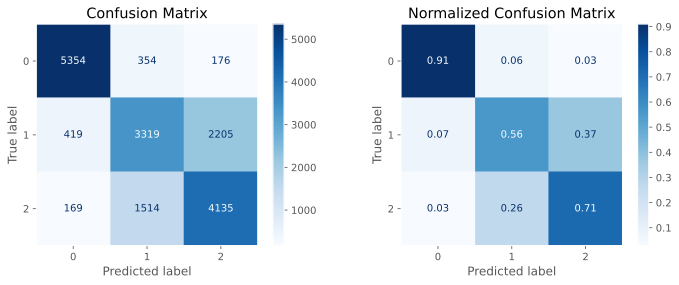

In [53]:
cm = confusion_matrix(Y_test, predicts)
cmn = confusion_matrix(Y_test, predicts, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
dispn = ConfusionMatrixDisplay(confusion_matrix=cmn)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))  # Specify the figure size

disp.plot(ax=ax[0], cmap='Blues', values_format='d')  # Adjust colormap and values_format as needed
ax[0].set_title('Confusion Matrix')
ax[0].grid(False)

dispn.plot(ax=ax[1], cmap='Blues', values_format='.2f')  # Adjust colormap and values_format as needed
ax[1].set_title('Normalized Confusion Matrix')
ax[1].grid(False)
plt.show()

In [54]:
param_grid = {
    'n_estimators': [800, 1000],
    'max_depth': [10, 12],
    'bootstrap': [True],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 8],
}

rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
rf_grid.fit(X_train, Y_train)

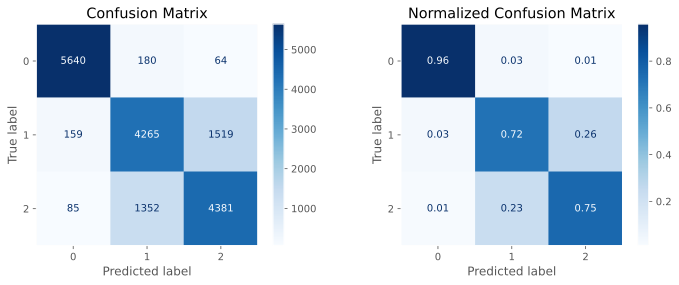

In [ ]:
pred2 = rf_grid.predict(X_test)

cmn2 = confusion_matrix(Y_test, pred2, normalize='true')
dispn2 = ConfusionMatrixDisplay(confusion_matrix=cmn2)

cm2 = confusion_matrix(Y_test, pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))  # Specify the figure size

disp2.plot(ax=ax[0], cmap='Blues', values_format='d')  # Adjust colormap and values_format as needed
ax[0].set_title('Confusion Matrix')
ax[0].grid(False)

dispn2.plot(ax=ax[1], cmap='Blues', values_format='.2f')  # Adjust colormap and values_format as needed
ax[1].set_title('Normalized Confusion Matrix')
ax[1].grid(False)
plt.show()

In [ ]:
print(classification_report(Y_test, pred2))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96      5884
           2       0.74      0.72      0.73      5943
           3       0.73      0.75      0.74      5818

    accuracy                           0.81     17645
   macro avg       0.81      0.81      0.81     17645
weighted avg       0.81      0.81      0.81     17645



In [ ]:
accuracy1 = round(rf.score(X_test, Y_test), 2) * 100
rf_accuracy2 = round(rf_grid.score(X_test, Y_test), 2) * 100
improvement_rf = round((rf_accuracy2 - accuracy1), 2) 
print(f'rf accuracy : {accuracy1} % \nrf_Grid accuracy: {rf_accuracy2} % \nImprovement: {improvement_rf} %')

rf accuracy : 72.0 % 
rf_Grid accuracy: 81.0 % 
Improvement: 9.0 %


In [ ]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

### MultiBinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha=1)
nb.fit(X_train,Y_train)

MultinomialNB(alpha=1)

In [ ]:
predict_nb = nb.predict(X_test)
print(classification_report(Y_test, predict_nb))

              precision    recall  f1-score   support

           1       0.73      0.80      0.76      5884
           2       0.48      0.40      0.44      5943
           3       0.55      0.58      0.56      5818

    accuracy                           0.59     17645
   macro avg       0.58      0.59      0.59     17645
weighted avg       0.58      0.59      0.59     17645



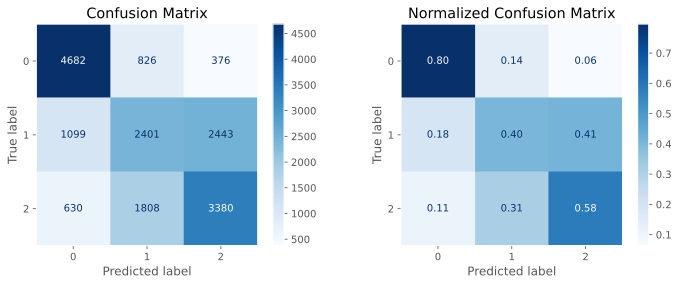

In [ ]:
cm = confusion_matrix(Y_test, predict_nb)
cmn = confusion_matrix(Y_test, predict_nb, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
dispn = ConfusionMatrixDisplay(confusion_matrix=cmn)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))  # Specify the figure size

disp.plot(ax=ax[0], cmap='Blues', values_format='d')  # Adjust colormap and values_format as needed
ax[0].set_title('Confusion Matrix')
ax[0].grid(False)

dispn.plot(ax=ax[1], cmap='Blues', values_format='.2f')  # Adjust colormap and values_format as needed
ax[1].set_title('Normalized Confusion Matrix')
ax[1].grid(False)
plt.show()

In [ ]:
parameters = {
    'alpha': [0.01, 0.1, 0.5, 0.6, 1.0, 2.0],  
    'fit_prior': [True, False],
    'force_alpha': [True, False]

}
nb_grid = GridSearchCV(nb, param_grid=parameters, cv = 5, verbose=2, n_jobs=4)
nb_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .......alpha=0.01, fit_prior=True, force_alpha=True; total time=   0.0s
[CV] END .......alpha=0.01, fit_prior=True, force_alpha=True; total time=   0.0s
[CV] END .......alpha=0.01, fit_prior=True, force_alpha=True; total time=   0.0s
[CV] END .......alpha=0.01, fit_prior=True, force_alpha=True; total time=   0.0s
[CV] END .......alpha=0.01, fit_prior=True, force_alpha=True; total time=   0.0s
[CV] END ......alpha=0.01, fit_prior=True, force_alpha=False; total time=   0.0s
[CV] END ......alpha=0.01, fit_prior=True, force_alpha=False; total time=   0.0s
[CV] END ......alpha=0.01, fit_prior=True, force_alpha=False; total time=   0.0s
[CV] END ......alpha=0.01, fit_prior=True, force_alpha=False; total time=   0.0s
[CV] END ......alpha=0.01, fit_prior=False, force_alpha=True; total time=   0.0s
[CV] END ......alpha=0.01, fit_prior=True, force_alpha=False; total time=   0.0s
[CV] END ......alpha=0.01, fit_prior=False, for

GridSearchCV(cv=5, estimator=MultinomialNB(alpha=1), n_jobs=4,
             param_grid={'alpha': [0.01, 0.1, 0.5, 0.6, 1.0, 2.0],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]},
             verbose=2)

In [ ]:
predict_nb2 = nb_grid.predict(X_test)
print(classification_report(Y_test, predict_nb2))

              precision    recall  f1-score   support

           1       0.73      0.80      0.76      5884
           2       0.48      0.40      0.44      5943
           3       0.55      0.58      0.56      5818

    accuracy                           0.59     17645
   macro avg       0.58      0.59      0.59     17645
weighted avg       0.58      0.59      0.59     17645



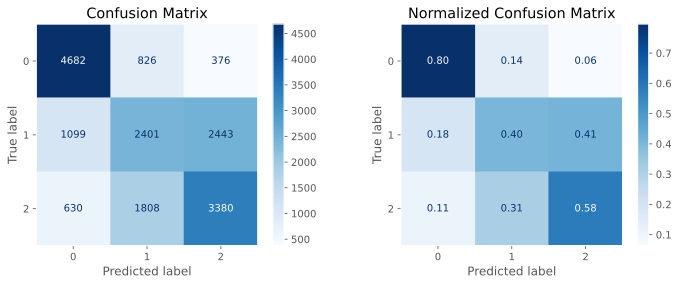

In [ ]:
cm = confusion_matrix(Y_test, predict_nb2)
cmn = confusion_matrix(Y_test, predict_nb2, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
dispn = ConfusionMatrixDisplay(confusion_matrix=cmn)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))  # Specify the figure size

disp.plot(ax=ax[0], cmap='Blues', values_format='d')  # Adjust colormap and values_format as needed
ax[0].set_title('Confusion Matrix')
ax[0].grid(False)

dispn.plot(ax=ax[1], cmap='Blues', values_format='.2f')  # Adjust colormap and values_format as needed
ax[1].set_title('Normalized Confusion Matrix')
ax[1].grid(False)
plt.show()

In [ ]:
nb_grid.best_params_

{'alpha': 2.0, 'fit_prior': True, 'force_alpha': True}

In [ ]:
accuracy1 = round(nb.score(X_test, Y_test), 2) * 100
nb_accuracy2 = round(nb_grid.score(X_test, Y_test), 2) * 100
improvement_nb = round((nb_accuracy2 - accuracy1), 2) 
print(f'nb accuracy : {accuracy1} % \nnb_Grid accuracy: {nb_accuracy2} % \nImprovement: {improvement_nb} %')

nb accuracy : 59.0 % 
nb_Grid accuracy: 59.0 % 
Improvement: 0.0 %


### SVC Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train, Y_train)

SVC(probability=True)

In [ ]:
predict_svc = svc.predict(X_test)
print(classification_report(Y_test, predict_svc))

              precision    recall  f1-score   support

           1       0.85      0.86      0.86      5884
           2       0.57      0.49      0.53      5943
           3       0.60      0.67      0.63      5818

    accuracy                           0.68     17645
   macro avg       0.67      0.68      0.67     17645
weighted avg       0.67      0.68      0.67     17645



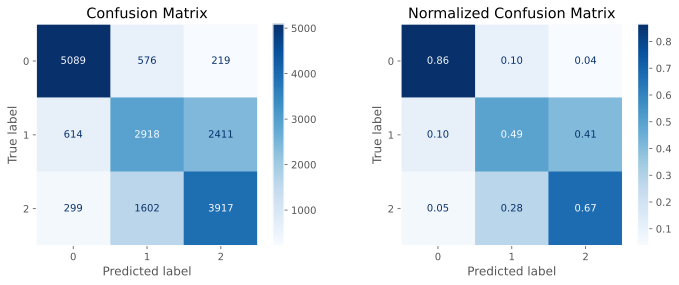

In [ ]:
cm = confusion_matrix(Y_test, predict_svc)
cmn = confusion_matrix(Y_test, predict_svc, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
dispn = ConfusionMatrixDisplay(confusion_matrix=cmn)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))  # Specify the figure size

disp.plot(ax=ax[0], cmap='Blues', values_format='d')  # Adjust colormap and values_format as needed
ax[0].set_title('Confusion Matrix')
ax[0].grid(False)

dispn.plot(ax=ax[1], cmap='Blues', values_format='.2f')  # Adjust colormap and values_format as needed
ax[1].set_title('Normalized Confusion Matrix')
ax[1].grid(False)
plt.show()

In [ ]:
parameters = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['poly', 'rbf', 'sigmoid'], # Kernel type
    'gamma': ['scale']
}

svc_grid = GridSearchCV(svc, param_grid=parameters, cv = 5)
svc_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

              precision    recall  f1-score   support

           1       0.87      0.92      0.90      5884
           2       0.63      0.53      0.57      5943
           3       0.61      0.68      0.65      5818

    accuracy                           0.71     17645
   macro avg       0.71      0.71      0.71     17645
weighted avg       0.71      0.71      0.71     17645



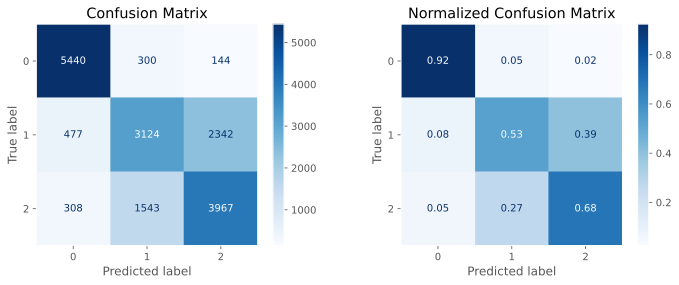

In [ ]:
predict_svc2 = svc_grid.predict(X_test)
print(classification_report(Y_test, predict_svc2))

cm = confusion_matrix(Y_test, predict_svc2)
cmn = confusion_matrix(Y_test, predict_svc2, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
dispn = ConfusionMatrixDisplay(confusion_matrix=cmn)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))  # Specify the figure size

disp.plot(ax=ax[0], cmap='Blues', values_format='d')  # Adjust colormap and values_format as needed
ax[0].set_title('Confusion Matrix')
ax[0].grid(False)

dispn.plot(ax=ax[1], cmap='Blues', values_format='.2f')  # Adjust colormap and values_format as needed
ax[1].set_title('Normalized Confusion Matrix')
ax[1].grid(False)
plt.show()

In [ ]:
accuracy1 = round(svc.score(X_test, Y_test), 2) * 100
svc_accuracy2 = round(svc_grid.score(X_test, Y_test), 2) * 100
improvement_svc = round((svc_accuracy2 - accuracy1), 2) 
print(f'svc accuracy : {accuracy1} % \nsvc_Grid accuracy: {svc_accuracy2} % \nImprovement: {improvement_svc} %')

svc accuracy : 68.0 % 
svc_Grid accuracy: 71.0 % 
Improvement: 3.0 %


## Accuracy Score Plot

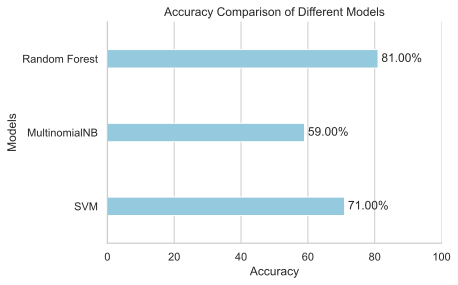

In [ ]:
names = ['Random Forest', 'MultinomialNB', 'SVM']
acc = [rf_accuracy2, nb_accuracy2, svc_accuracy2]

sns.set(style="whitegrid")  # Set the style

plt.figure(figsize=(6, 4))
barplot = sns.barplot(x=acc, y=names, color='skyblue', orient='h', ci=None, width = 0.25)
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.title("Accuracy Comparison of Different Models")
plt.xlim(0, 100)  # Set x-axis limits
for i, v in enumerate(acc):
    barplot.text(v + 1, i, f'{v:.2f}%', va='center')
sns.despine()  # Remove spines
plt.show()